# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:55:47.868739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:55:51.238612
2025-04-14 22:55:51.238612


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:55:44"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

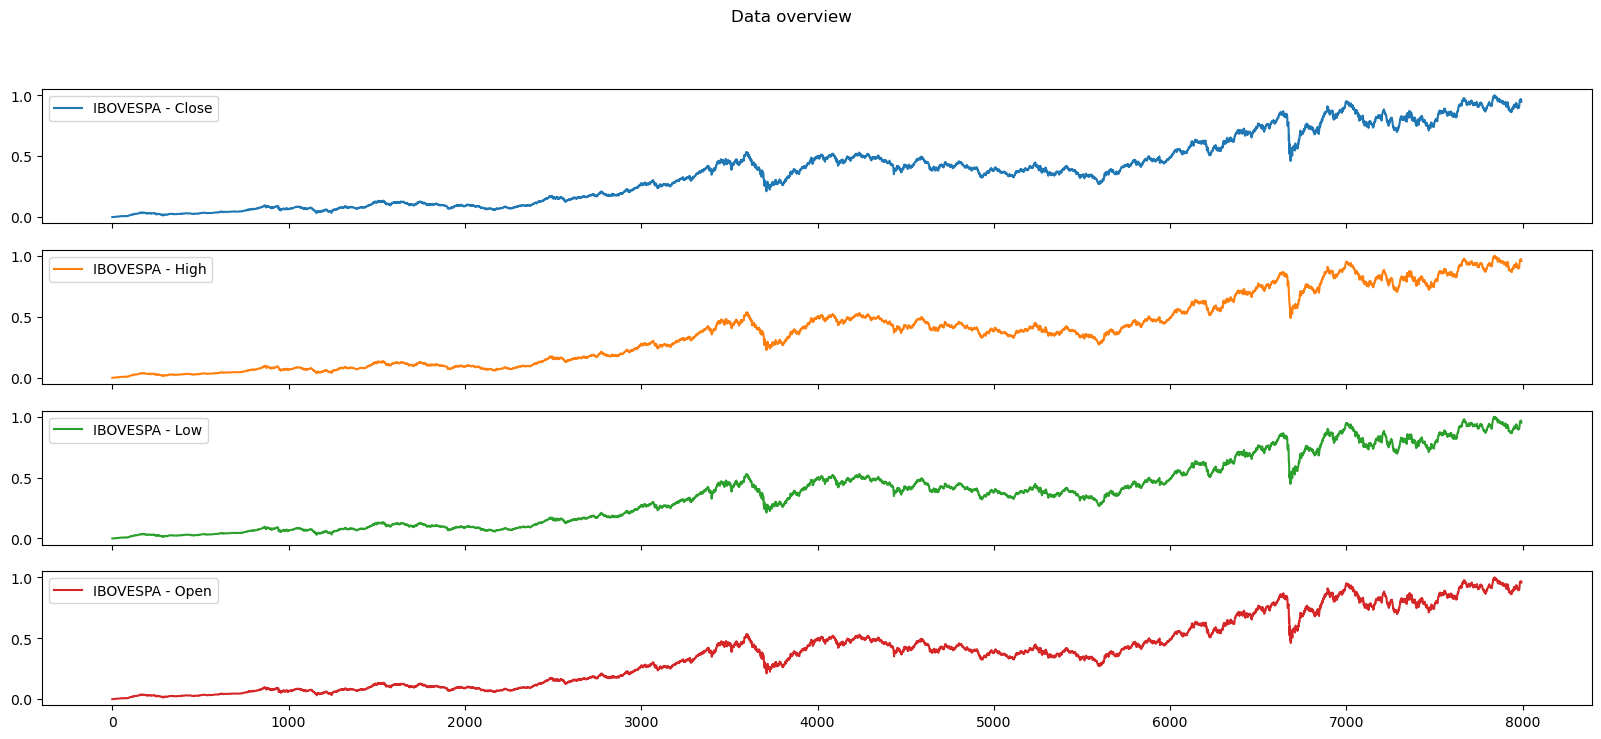

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

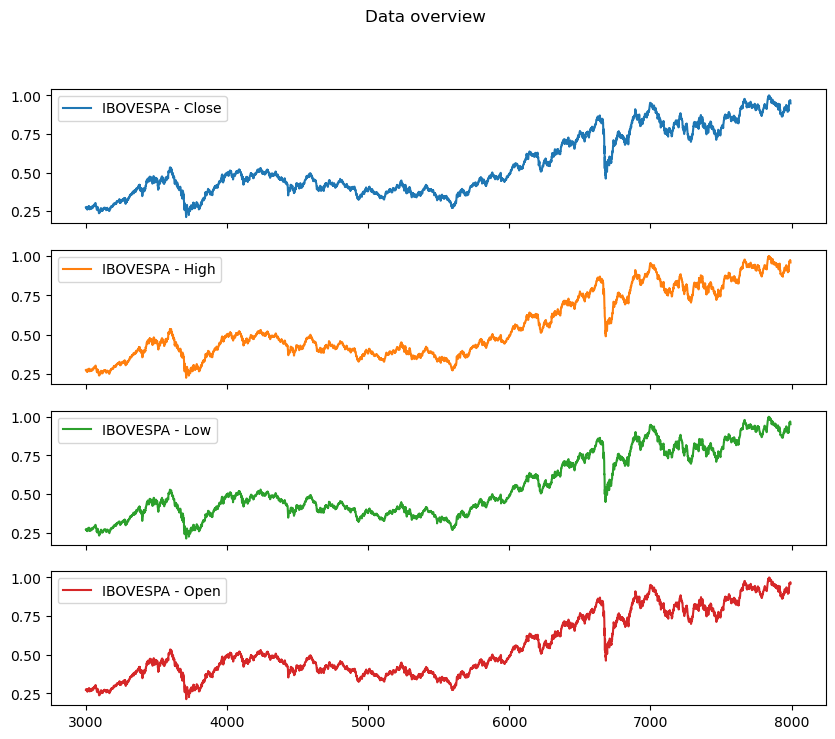

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

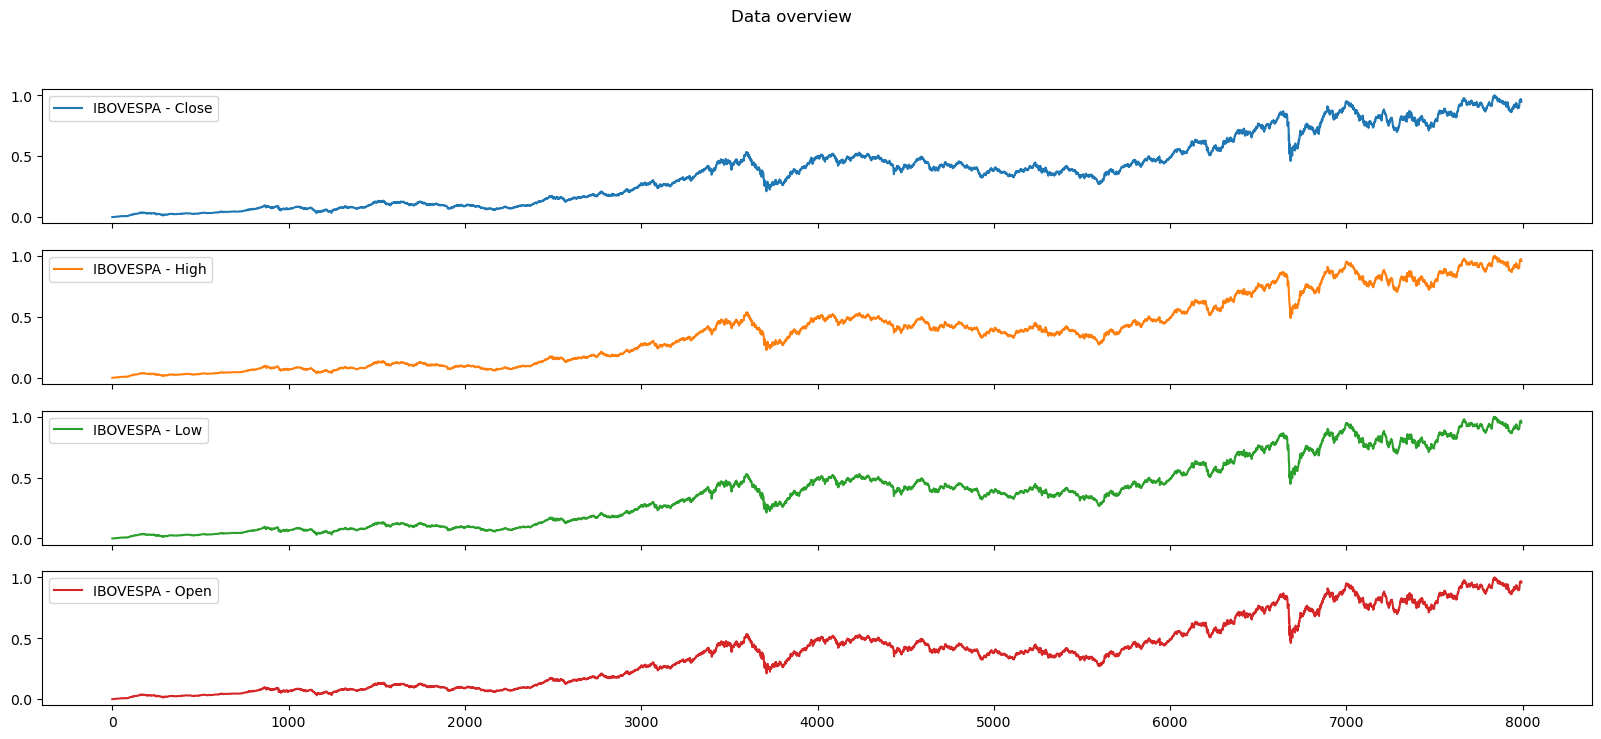

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

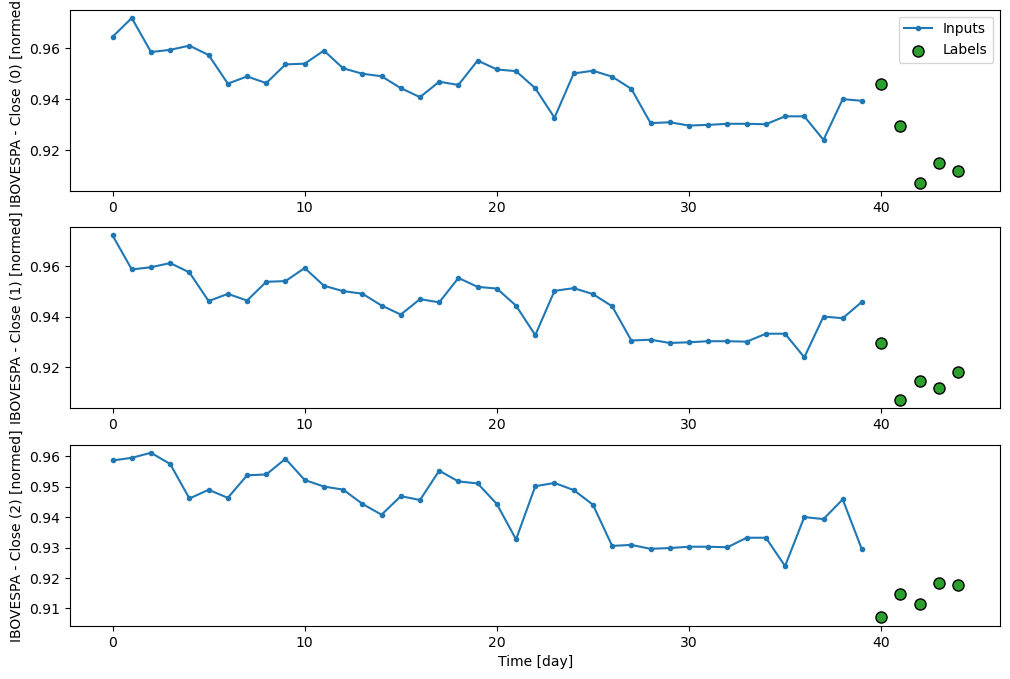

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 8:58 2s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  2/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 80.9324 - mean_squared_error: 4.6215e-05 - root_mean_squared_error: 0.0067

  3/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.0478 - mean_squared_error: 5.9528e-05 - root_mean_squared_error: 0.0076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.3249 - mean_squared_error: 6.7342e-05 - root_mean_squared_error: 0.0081

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 59.8476 - mean_squared_error: 6.9990e-05 - root_mean_squared_error: 0.0083

  7/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 56.7820 - mean_squared_error: 7.0553e-05 - root_mean_squared_error: 0.0083

  8/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 54.2936 - mean_squared_error: 7.0457e-05 - root_mean_squared_error: 0.0083

  9/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 52.0682 - mean_squared_error: 6.9672e-05 - root_mean_squared_error: 0.0083

 10/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 50.0000 - mean_squared_error: 6.8439e-05 - root_mean_squared_error: 0.0082

 11/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 48.1462 - mean_squared_error: 6.7054e-05 - root_mean_squared_error: 0.0081

 12/237 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 46.4943 - mean_squared_error: 6.5701e-05 - root_mean_squared_error: 0.0080

 13/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 44.9785 - mean_squared_error: 6.4303e-05 - root_mean_squared_error: 0.0080

 14/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 43.6209 - mean_squared_error: 6.2970e-05 - root_mean_squared_error: 0.0079

 15/237 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 42.4203 - mean_squared_error: 6.1895e-05 - root_mean_squared_error: 0.0078

 16/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 41.3464 - mean_squared_error: 6.1007e-05 - root_mean_squared_error: 0.0077

 17/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 40.3628 - mean_squared_error: 6.0181e-05 - root_mean_squared_error: 0.0077

 18/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 39.4430 - mean_squared_error: 5.9373e-05 - root_mean_squared_error: 0.0076

 19/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 38.5626 - mean_squared_error: 5.8531e-05 - root_mean_squared_error: 0.0076

 20/237 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 37.7354 - mean_squared_error: 5.7712e-05 - root_mean_squared_error: 0.0075

 22/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 36.2089 - mean_squared_error: 5.6102e-05 - root_mean_squared_error: 0.0074

 24/237 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 34.9091 - mean_squared_error: 5.5434e-05 - root_mean_squared_error: 0.0074

 25/237 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 34.3357 - mean_squared_error: 5.5577e-05 - root_mean_squared_error: 0.0074

 26/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 33.8017 - mean_squared_error: 5.6059e-05 - root_mean_squared_error: 0.0074

 27/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 33.2988 - mean_squared_error: 5.6684e-05 - root_mean_squared_error: 0.0075

 28/237 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.8252 - mean_squared_error: 5.7426e-05 - root_mean_squared_error: 0.0075

 29/237 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.3953 - mean_squared_error: 5.8528e-05 - root_mean_squared_error: 0.0076

 30/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.9860 - mean_squared_error: 5.9556e-05 - root_mean_squared_error: 0.0076

 31/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.5968 - mean_squared_error: 6.0550e-05 - root_mean_squared_error: 0.0077

 32/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.2384 - mean_squared_error: 6.1883e-05 - root_mean_squared_error: 0.0078

 33/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 30.8895 - mean_squared_error: 6.3080e-05 - root_mean_squared_error: 0.0079

 34/237 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 30.5542 - mean_squared_error: 6.4195e-05 - root_mean_squared_error: 0.0079

 36/237 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 30.0292 - mean_squared_error: 6.7939e-05 - root_mean_squared_error: 0.0081

 38/237 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.5925 - mean_squared_error: 7.1875e-05 - root_mean_squared_error: 0.0083

 40/237 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 29.2370 - mean_squared_error: 7.7114e-05 - root_mean_squared_error: 0.0086

 42/237 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 28.9650 - mean_squared_error: 8.4467e-05 - root_mean_squared_error: 0.0089

 44/237 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 28.7185 - mean_squared_error: 9.1508e-05 - root_mean_squared_error: 0.0092

 46/237 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4805 - mean_squared_error: 9.8186e-05 - root_mean_squared_error: 0.0095

 48/237 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.4130 - mean_squared_error: 1.6233e-04 - root_mean_squared_error: 0.0108

 50/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.3336 - mean_squared_error: 2.1938e-04 - root_mean_squared_error: 0.0119

 52/237 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.2408 - mean_squared_error: 2.7012e-04 - root_mean_squared_error: 0.0130

 54/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 28.1287 - mean_squared_error: 3.1508e-04 - root_mean_squared_error: 0.0139

 55/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 28.0690 - mean_squared_error: 3.3571e-04 - root_mean_squared_error: 0.0144

 57/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.9474 - mean_squared_error: 3.7369e-04 - root_mean_squared_error: 0.0152

 58/237 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 27.8848 - mean_squared_error: 3.9114e-04 - root_mean_squared_error: 0.0156

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 27.7642 - mean_squared_error: 4.2347e-04 - root_mean_squared_error: 0.0163 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.7013 - mean_squared_error: 4.3834e-04 - root_mean_squared_error: 0.0166

 62/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 27.6387 - mean_squared_error: 4.5247e-04 - root_mean_squared_error: 0.0169

 63/237 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 27.5757 - mean_squared_error: 4.6586e-04 - root_mean_squared_error: 0.0172

 65/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 27.4462 - mean_squared_error: 4.9057e-04 - root_mean_squared_error: 0.0178

 67/237 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 27.3337 - mean_squared_error: 5.1315e-04 - root_mean_squared_error: 0.0183

 69/237 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 27.2271 - mean_squared_error: 5.3363e-04 - root_mean_squared_error: 0.0188

 71/237 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 27.1143 - mean_squared_error: 5.5206e-04 - root_mean_squared_error: 0.0192

 73/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 27.0101 - mean_squared_error: 5.6907e-04 - root_mean_squared_error: 0.0196

 75/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 26.9205 - mean_squared_error: 5.8561e-04 - root_mean_squared_error: 0.0200

 77/237 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 26.8490 - mean_squared_error: 6.0332e-04 - root_mean_squared_error: 0.0204

 78/237 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 26.8181 - mean_squared_error: 6.1247e-04 - root_mean_squared_error: 0.0206

 79/237 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 26.7880 - mean_squared_error: 6.2143e-04 - root_mean_squared_error: 0.0208

 80/237 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 26.7558 - mean_squared_error: 6.2997e-04 - root_mean_squared_error: 0.0210

 81/237 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 26.7212 - mean_squared_error: 6.3811e-04 - root_mean_squared_error: 0.0212

 82/237 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 26.6857 - mean_squared_error: 6.4593e-04 - root_mean_squared_error: 0.0214

 83/237 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 26.6493 - mean_squared_error: 6.5343e-04 - root_mean_squared_error: 0.0216

 84/237 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 26.6108 - mean_squared_error: 6.6057e-04 - root_mean_squared_error: 0.0217

 85/237 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 26.5704 - mean_squared_error: 6.6738e-04 - root_mean_squared_error: 0.0219

 86/237 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 26.5291 - mean_squared_error: 6.7392e-04 - root_mean_squared_error: 0.0220

 87/237 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 26.4862 - mean_squared_error: 6.8016e-04 - root_mean_squared_error: 0.0222

 88/237 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 26.4417 - mean_squared_error: 6.8610e-04 - root_mean_squared_error: 0.0223

 89/237 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 26.3958 - mean_squared_error: 6.9176e-04 - root_mean_squared_error: 0.0225

 90/237 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 26.3494 - mean_squared_error: 6.9723e-04 - root_mean_squared_error: 0.0226

 91/237 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 26.3027 - mean_squared_error: 7.0250e-04 - root_mean_squared_error: 0.0227

 93/237 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 26.2086 - mean_squared_error: 7.1263e-04 - root_mean_squared_error: 0.0230

 94/237 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 26.1602 - mean_squared_error: 7.1739e-04 - root_mean_squared_error: 0.0231

 95/237 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 26.1119 - mean_squared_error: 7.2208e-04 - root_mean_squared_error: 0.0232 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 26.0649 - mean_squared_error: 7.2698e-04 - root_mean_squared_error: 0.0233

 97/237 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 26.0181 - mean_squared_error: 7.3183e-04 - root_mean_squared_error: 0.0234

 98/237 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 25.9707 - mean_squared_error: 7.3648e-04 - root_mean_squared_error: 0.0236

 99/237 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 25.9232 - mean_squared_error: 7.4104e-04 - root_mean_squared_error: 0.0237

101/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 25.8311 - mean_squared_error: 7.5092e-04 - root_mean_squared_error: 0.0239

102/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 25.7865 - mean_squared_error: 7.5628e-04 - root_mean_squared_error: 0.0240

103/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 25.7431 - mean_squared_error: 7.6217e-04 - root_mean_squared_error: 0.0241

104/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 25.7007 - mean_squared_error: 7.6859e-04 - root_mean_squared_error: 0.0243

105/237 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 25.6585 - mean_squared_error: 7.7514e-04 - root_mean_squared_error: 0.0244

107/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 25.5725 - mean_squared_error: 7.8770e-04 - root_mean_squared_error: 0.0247

109/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 25.4858 - mean_squared_error: 8.0004e-04 - root_mean_squared_error: 0.0249

110/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 25.4418 - mean_squared_error: 8.0599e-04 - root_mean_squared_error: 0.0250

111/237 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 25.3979 - mean_squared_error: 8.1203e-04 - root_mean_squared_error: 0.0251

113/237 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 25.3100 - mean_squared_error: 8.2427e-04 - root_mean_squared_error: 0.0254

115/237 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 25.2250 - mean_squared_error: 8.3734e-04 - root_mean_squared_error: 0.0256

117/237 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 25.1487 - mean_squared_error: 8.5312e-04 - root_mean_squared_error: 0.0259

119/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 25.0744 - mean_squared_error: 8.6884e-04 - root_mean_squared_error: 0.0262

120/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 25.0372 - mean_squared_error: 8.7659e-04 - root_mean_squared_error: 0.0263

121/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 25.0006 - mean_squared_error: 8.8449e-04 - root_mean_squared_error: 0.0265

123/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 24.9306 - mean_squared_error: 9.0245e-04 - root_mean_squared_error: 0.0268

124/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 24.8974 - mean_squared_error: 9.1318e-04 - root_mean_squared_error: 0.0269

125/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 24.8652 - mean_squared_error: 9.2484e-04 - root_mean_squared_error: 0.0271

127/237 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 24.8025 - mean_squared_error: 9.4929e-04 - root_mean_squared_error: 0.0275

129/237 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 24.7385 - mean_squared_error: 9.7298e-04 - root_mean_squared_error: 0.0278

131/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 24.6739 - mean_squared_error: 9.9591e-04 - root_mean_squared_error: 0.0281

134/237 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 24.5737 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286    

136/237 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 24.5046 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

138/237 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 24.4347 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

141/237 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 24.3289 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

143/237 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 24.2590 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

146/237 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 24.1530 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

149/237 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 24.0445 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

151/237 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 23.9710 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

153/237 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 23.8972 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

155/237 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 23.8232 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

157/237 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 23.7496 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

159/237 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 23.6758 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

161/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 23.6020 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

163/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 23.5279 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

165/237 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 23.4545 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 23.3832 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 23.3126 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 23.2425 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

173/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 23.1723 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

175/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 23.1023 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

177/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 23.0341 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

179/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.9687 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

180/237 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 22.9374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.8769 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 22.8479 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.8194 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.7915 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 22.7639 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.7367 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 22.7098 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.6829 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 22.6559 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 22.6288 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.6019 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

194/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.5487 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

196/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.4958 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

198/237 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 22.4432 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

200/237 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 22.3916 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 22.3405 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 22.2894 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 22.2381 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 22.1871 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 22.1370 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 22.0871 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

214/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 22.0377 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

216/237 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 21.9892 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

218/237 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 21.9410 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 21.8931 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.8469 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 21.8016 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 21.7561 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 21.7105 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 21.6655 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 21.5981 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.5529 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 21.4853 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298 - val_mean_absolute_percentage_error: 3.1365 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0353 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.4159 - mean_absolute_error: 0.4159 - mean_absolute_percentage_error: 5587.1475 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.4160

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 4635.4775 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.4103 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 3913.4045 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.4024

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 3439.9207 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3924

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.3816 - mean_absolute_error: 0.3816 - mean_absolute_percentage_error: 3246.8542 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3855

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 3203.2678 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4352

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 3153.4148 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4715

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.4329 - mean_absolute_error: 0.4329 - mean_absolute_percentage_error: 3079.8608 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5248

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 3047.3945 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5443

 14/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 3014.6194 - mean_squared_error: 0.3542 - root_mean_squared_error: 0.5596

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.4561 - mean_absolute_error: 0.4561 - mean_absolute_percentage_error: 2978.6343 - mean_squared_error: 0.3669 - root_mean_squared_error: 0.5715

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 2938.6099 - mean_squared_error: 0.3759 - root_mean_squared_error: 0.5805

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 2896.7463 - mean_squared_error: 0.3821 - root_mean_squared_error: 0.5872

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.4617 - mean_absolute_error: 0.4617 - mean_absolute_percentage_error: 2854.6377 - mean_squared_error: 0.3864 - root_mean_squared_error: 0.5922

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 2770.3821 - mean_squared_error: 0.3905 - root_mean_squared_error: 0.5983

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.4570 - mean_absolute_error: 0.4570 - mean_absolute_percentage_error: 2685.8438 - mean_squared_error: 0.3903 - root_mean_squared_error: 0.6006

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.4515 - mean_absolute_error: 0.4515 - mean_absolute_percentage_error: 2603.3870 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6003

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 2524.0940 - mean_squared_error: 0.3829 - root_mean_squared_error: 0.5982

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 2448.1577 - mean_squared_error: 0.3774 - root_mean_squared_error: 0.5949 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 2375.9917 - mean_squared_error: 0.3712 - root_mean_squared_error: 0.5908

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 2307.6143 - mean_squared_error: 0.3646 - root_mean_squared_error: 0.5861

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.4140 - mean_absolute_error: 0.4140 - mean_absolute_percentage_error: 2242.9041 - mean_squared_error: 0.3579 - root_mean_squared_error: 0.5811

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 2181.8672 - mean_squared_error: 0.3511 - root_mean_squared_error: 0.5758

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3984 - mean_absolute_error: 0.3984 - mean_absolute_percentage_error: 2124.1594 - mean_squared_error: 0.3445 - root_mean_squared_error: 0.5704

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_absolute_percentage_error: 2069.6150 - mean_squared_error: 0.3379 - root_mean_squared_error: 0.5649

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 2017.9963 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5595

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3801 - mean_absolute_error: 0.3801 - mean_absolute_percentage_error: 1993.1995 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5567

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3766 - mean_absolute_error: 0.3766 - mean_absolute_percentage_error: 1969.0513 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5540

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3731 - mean_absolute_error: 0.3731 - mean_absolute_percentage_error: 1945.5220 - mean_squared_error: 0.3221 - root_mean_squared_error: 0.5513

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1900.2299 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5459

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1857.1682 - mean_squared_error: 0.3102 - root_mean_squared_error: 0.5406

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3534 - mean_absolute_error: 0.3534 - mean_absolute_percentage_error: 1816.1798 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5354

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1777.1267 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5303

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1739.8817 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5253

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1704.3217 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5204

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1670.3369 - mean_squared_error: 0.2838 - root_mean_squared_error: 0.5156

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3220 - mean_absolute_error: 0.3220 - mean_absolute_percentage_error: 1622.1138 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5086

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1576.9196 - mean_squared_error: 0.2701 - root_mean_squared_error: 0.5019

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1548.3389 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4975

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1520.9105 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4933

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1494.5648 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4891

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1456.9196 - mean_squared_error: 0.2518 - root_mean_squared_error: 0.4830

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1432.9875 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4791

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1409.9258 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4753

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 1387.6882 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4715

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1366.2290 - mean_squared_error: 0.2377 - root_mean_squared_error: 0.4678

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1345.5065 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4643

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1325.4813 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4608

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1306.1202 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4573

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1287.3903 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4540

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1269.2567 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4507

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1251.6936 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4475

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1234.6720 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4444

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1210.0999 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4398

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1194.3228 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4368

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1179.0037 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4339

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2420 - mean_absolute_error: 0.2420 - mean_absolute_percentage_error: 1164.1226 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4310

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1149.6592 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4282

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1128.7100 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4241

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2331 - mean_absolute_error: 0.2331 - mean_absolute_percentage_error: 1115.2163 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4215

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1102.0830 - mean_squared_error: 0.1952 - root_mean_squared_error: 0.4188

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1083.0370 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4150

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1070.7505 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4125

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1058.7783 - mean_squared_error: 0.1881 - root_mean_squared_error: 0.4101

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2208 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 1047.1108 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4077

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1035.7371 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4054

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 1019.1999 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.4020

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1008.5054 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3997

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 998.0620 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3976 

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 987.8602 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3954

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 977.8934 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3933

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 968.1551 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3912

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 958.6378 - mean_squared_error: 0.1714 - root_mean_squared_error: 0.3892

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 949.3310 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3872

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 940.2256 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3852

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 926.9312 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3823

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 918.3021 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3804

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 909.8533 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3786

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 901.5781 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3768

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 893.4714 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3749

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 889.4794 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3741

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 885.5275 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3732

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1923 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 881.6151 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3723

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 873.9063 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3705

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 870.1086 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3697

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 866.3483 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3688

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 862.6246 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3680

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 858.9370 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3671

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 855.2847 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3663

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 851.6672 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3655

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 844.5347 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3638

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 837.5353 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3622

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 830.6661 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3606

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 823.9239 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3591

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 817.3047 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3575

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 810.8043 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3560

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 804.4205 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3545

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 798.1501 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3530

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 791.9899 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3515

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 785.9361 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3501

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 779.9858 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3486

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 774.1360 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3472

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 768.3841 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3458

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 762.7280 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3444

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 757.1660 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3431

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 751.6947 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3417

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 746.3119 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3404

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 741.0154 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3391

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 735.8034 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3378

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 730.6734 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3365

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 725.6241 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3353

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 720.6555 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3341

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 715.7646 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3329

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 708.5681 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3311

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 703.8600 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3299

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 699.2222 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3287

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 692.3930 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3270

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 687.9230 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 681.3383 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3242

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 677.0267 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3231

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1563 - mean_absolute_error: 0.1563 - mean_absolute_percentage_error: 672.7759 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3220

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 666.5109 - mean_squared_error: 0.1218 - root_mean_squared_error: 0.3204

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 660.3779 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3189

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 658.3665 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3183 - val_loss: 0.0454 - val_mean_absolute_error: 0.0454 - val_mean_absolute_percentage_error: 4.7881 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0503 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.4131 - mean_absolute_error: 0.4131 - mean_absolute_percentage_error: 5553.3887 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.4133

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 4621.0303 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.4095 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 3907.7622 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.4031

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 3443.1155 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3949

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 3127.3579 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3851

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 2878.3477 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3739

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 2768.1685 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3679

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.3467 - mean_absolute_error: 0.3467 - mean_absolute_percentage_error: 2576.1038 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3564

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 2412.9939 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3456

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 2339.4580 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3404

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 2270.7192 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3354

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 2206.4324 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3306

 20/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 2146.1787 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3260

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 2089.5298 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3215

 22/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 2036.1304 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3172

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1985.7124 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.3131

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1892.9126 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.3053

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1809.3479 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2980

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1733.7042 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2912

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2509 - mean_absolute_error: 0.2509 - mean_absolute_percentage_error: 1664.8773 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2849

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1601.9502 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2790

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1544.1786 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1490.9465 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2682

 39/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1441.7231 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2632

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1396.0444 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2586

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.2108 - mean_absolute_error: 0.2108 - mean_absolute_percentage_error: 1353.5349 - mean_squared_error: 0.0710 - root_mean_squared_error: 0.2542

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1313.8566 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2500

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 1276.7244 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2460

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 1241.8938 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2422

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 1209.1445 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2386

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 1178.2880 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2352

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 1149.1587 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2319

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1790 - mean_absolute_error: 0.1790 - mean_absolute_percentage_error: 1121.6094 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2287

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1754 - mean_absolute_error: 0.1754 - mean_absolute_percentage_error: 1095.5100 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2257

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 1070.7463 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2228

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 1047.2128 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2200

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 1024.8169 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1003.4762 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2148

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 983.1138 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2123 

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 963.6609 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2099

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 945.0568 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2076

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 927.2436 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.2053

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 910.1696 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2032

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1462 - mean_absolute_error: 0.1462 - mean_absolute_percentage_error: 893.7885 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2011

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - mean_absolute_percentage_error: 878.0579 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1990

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1417 - mean_absolute_error: 0.1417 - mean_absolute_percentage_error: 862.9374 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1971

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 848.3903 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.1952

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 834.3837 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1933

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 820.8867 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1915

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 807.8707 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1898

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 795.3094 - mean_squared_error: 0.0422 - root_mean_squared_error: 0.1881

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 783.1783 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1865

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 771.4554 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1849

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 760.1191 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1833

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 754.5897 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1825

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1239 - mean_absolute_error: 0.1239 - mean_absolute_percentage_error: 743.7971 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1810

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 738.5294 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1803

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 733.3447 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1796

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 723.2164 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1781

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 713.3966 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1768

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 708.5980 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1761

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 699.2142 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1747

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 690.1044 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1734

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 681.2571 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1722

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 672.6612 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1709

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 664.3048 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1697

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 660.2134 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1691

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 652.1974 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1679

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 648.2705 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1673

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 644.3962 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1668

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 640.5734 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1662

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 636.8008 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1656

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 633.0775 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1651

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 625.7753 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1640

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 622.1943 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1634

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 615.1678 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1624

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 608.3162 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1614

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 601.6325 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1603

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 595.1107 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1593

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 588.7448 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1584

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 582.5291 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1574

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 576.4581 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1565

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 570.5269 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1555

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 564.7302 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1546

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 559.0634 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1537

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 553.5220 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1529

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 548.1019 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1520

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 542.7989 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1512

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 537.6089 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1503

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 532.5283 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1495

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 527.5533 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1487

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 522.6807 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1479

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 517.9075 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1472

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 513.2305 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1464

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 508.6465 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1457

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 506.3885 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1453

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 504.1526 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1449

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 499.7463 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1442

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 495.4251 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1435

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 491.1865 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1428

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 487.0279 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1421

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 482.9470 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1414

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 478.9415 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1407

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 475.0091 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1401

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 471.1480 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1394

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 467.3562 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1388

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 463.6314 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1382

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 459.9725 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1375

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 456.3775 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1369

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 452.8446 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1363

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 449.3726 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1357

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 444.2743 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1349

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 440.9463 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1343

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 437.6731 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1337

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 434.4546 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1332

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 431.2888 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1326

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 428.1737 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1321

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 425.1089 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1316

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 422.0932 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1311

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 419.1251 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1306

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 414.7596 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1298

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 411.9058 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1294

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 409.0956 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1289

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 406.3277 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1284

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 402.2539 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1278

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 398.2705 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1271

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 394.3751 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1264

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 393.0977 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1262 - val_loss: 0.0156 - val_mean_absolute_error: 0.0156 - val_mean_absolute_percentage_error: 1.6583 - val_mean_squared_error: 4.0766e-04 - val_root_mean_squared_error: 0.0202 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 2203.9919 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1709

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 1658.3900 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1651 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 1416.4290 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1583

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1245.4307 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1506

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1326 - mean_absolute_error: 0.1326 - mean_absolute_percentage_error: 1121.9923 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1438

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1261 - mean_absolute_error: 0.1261 - mean_absolute_percentage_error: 1028.5797 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1381

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 952.0989 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1329 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 861.0759 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1263

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 811.9606 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1226

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 749.6241 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1176

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 713.9721 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1146

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 681.9755 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1119

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 653.1014 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1093

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 626.8871 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1069

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 602.9617 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1047

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 570.7368 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1016

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 542.2473 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0988

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 525.0059 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0970

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 508.9763 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0953

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 494.0457 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0938

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 480.0907 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0923

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 460.7894 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0902

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 448.8800 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0889

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 437.6519 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0876

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 427.0554 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0864

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 412.2176 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0847

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 402.9680 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0837

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 394.1853 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0826

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 381.8091 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0812

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 374.0531 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0802

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 363.0874 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0789

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 352.8434 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0776

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 346.3761 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0768

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 337.1684 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0756

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 331.3353 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0749

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 325.7305 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0742

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 317.7165 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 312.6190 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0725

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 307.7051 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0718

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 302.9639 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0712

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 298.3869 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 293.9650 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0700

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 289.6913 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0694

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 285.5591 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0689

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 281.5587 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0683

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 275.7918 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 272.0941 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 270.2874 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 266.7547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 263.3251 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 259.9948 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0654

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 256.7599 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0649

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 253.6173 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 250.5614 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 247.5883 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0637

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 244.6950 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0633

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 241.8772 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0629

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 239.1323 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0625

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 235.1452 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0620

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 232.5695 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0616

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 230.0568 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 227.6045 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 225.2104 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 222.8725 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0603

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 220.5886 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 218.3568 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 216.1754 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 212.9939 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 210.9307 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0586

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 208.9123 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0583

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 205.9651 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 204.0520 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 201.2559 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 199.4392 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 197.6592 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 195.9147 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0564

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 194.2047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0561

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 192.5278 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 190.8834 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 189.2706 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 187.6885 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 186.1364 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 184.6130 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0546

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 183.1177 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0544

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 181.6496 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 180.2078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0540

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 178.7917 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 177.4004 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 176.0334 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0533

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 174.6901 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0531

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 173.3698 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0529

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 172.0719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0527

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 171.4311 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0526

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 170.1655 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0524

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 168.9208 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0522

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 167.6964 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 166.4919 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0518

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 165.3072 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 164.1413 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0515

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 163.5653 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0514

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 162.4271 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 161.8647 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 160.7529 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 159.6583 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 158.5809 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 157.5199 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 155.9581 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0503

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 154.9364 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 153.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0500

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 152.9377 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 151.9599 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 150.5209 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341 - val_mean_absolute_percentage_error: 3.6092 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0377 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 1445.7700 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1081

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1175.0287 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1031 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 970.5342 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0963 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 829.3626 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0896

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 736.7395 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0847

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 670.7908 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0810

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 618.0994 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0778

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 555.8713 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0738

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 507.5317 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 480.4743 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0684

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 445.8354 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 425.7670 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0642

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 407.7128 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0627

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 383.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 369.4838 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0595

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 350.3019 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 338.7722 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 328.1003 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 313.4687 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 304.5193 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 292.1426 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 284.5088 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 277.3148 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0508

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 270.5246 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 264.1039 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0494

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 258.0208 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 252.2497 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 246.7658 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 241.5465 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 234.1738 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 227.2966 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 222.9614 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 216.7990 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 212.9006 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 207.3438 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 203.8189 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 200.4272 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 197.1612 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 194.0139 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 190.9788 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 188.0496 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 185.2204 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 181.1533 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 178.5526 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 176.0351 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 172.4059 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 170.0793 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 166.7198 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 163.5076 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 161.4432 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 158.4572 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 156.5357 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 154.6670 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 152.8484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 151.0775 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 149.3527 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 147.6720 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 145.2299 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 143.6519 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 142.1123 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 139.8719 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 138.4225 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 137.0073 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 135.6246 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 133.6091 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 132.3025 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 131.0244 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 129.7740 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 128.5503 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 127.3523 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 126.1792 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0330

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 124.4648 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 123.3511 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 122.2602 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 121.1909 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 120.1424 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 119.1143 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 118.1060 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 116.6297 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 115.6686 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 114.2602 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 112.8902 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 111.9975 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 110.6881 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 109.4131 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 108.5817 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.3612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 106.1715 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.3948 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 104.2535 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 103.5087 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 102.7758 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.6984 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 100.9945 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 99.9591 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297 

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.9483 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 98.2876 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 97.3152 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 96.3649 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 95.7430 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 94.8272 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 93.9319 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293 - val_loss: 0.0477 - val_mean_absolute_error: 0.0477 - val_mean_absolute_percentage_error: 5.0629 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0505 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1718.8875 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1300

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 1404.0834 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1252 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 1168.1665 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1189

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1006.6092 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1121

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 891.5593 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1060 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 808.6499 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1011

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 744.6923 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0972

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 691.8445 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0936

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 627.5645 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0890

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 592.2179 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0863

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 547.0964 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0827

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 521.3054 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0806

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 498.1667 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0786

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 477.2856 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 458.3717 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0751

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 441.0979 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0735

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 425.2784 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0721

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 410.7146 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0707

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 397.2697 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0694

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 384.7917 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 373.1734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 362.3247 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0659

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 352.1691 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 338.0952 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0634

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 325.2393 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 317.2682 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 309.7283 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0603

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 302.5839 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 295.8061 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 292.5447 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 286.2635 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 280.2837 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0570

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 274.5860 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 269.1479 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 263.9506 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 258.9773 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 254.2128 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0539

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 249.6440 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 245.2618 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 241.0515 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 237.0038 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 233.1083 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 229.3562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 225.7394 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 220.5504 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 217.2390 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 214.0392 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 210.9449 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 206.4884 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 202.2404 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 199.5164 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 195.5830 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 191.8212 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 189.4040 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0456

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 185.9071 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 183.6572 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 181.4698 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 179.3423 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 177.2711 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 174.2646 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 172.3247 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 169.5048 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 167.6820 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 165.9029 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 163.3130 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 161.6366 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 159.1940 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 157.6115 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 156.0641 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 153.8060 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 152.3412 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.2020 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 148.8130 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 147.4528 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 145.4647 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 144.1731 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 142.9071 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 141.6659 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 140.4489 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 138.6673 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 137.5083 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 135.8109 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 134.7053 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 133.6201 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 132.5545 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 131.5079 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 130.4799 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 129.4700 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 128.4779 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 127.5028 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 126.0712 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 125.1368 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 123.7641 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 122.4250 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 121.5514 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 120.2674 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 119.0144 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 118.1961 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 116.9926 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 115.8173 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 115.0487 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 113.9174 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 112.8115 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 112.0876 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 111.0214 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 110.6718 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 1.9887 - val_mean_squared_error: 5.2048e-04 - val_root_mean_squared_error: 0.0228 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 2058.1558 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1535

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 1543.5190 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1470 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 1320.8318 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1412

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 1164.6406 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1347

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 1045.1483 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1283

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 953.9587 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1228 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 850.6914 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1160

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 795.2418 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1120

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 747.8267 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1085

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 706.8611 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1053

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 670.8041 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1023

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 638.7190 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0996

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 596.6962 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0960

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 560.5566 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0927

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 539.1232 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0908

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 510.2908 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0880

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 484.8061 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0855

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 469.3753 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0840

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 448.2246 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0818

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 435.2933 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 423.1888 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0792

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 411.8289 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0780

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 401.1411 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 386.2445 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 376.9942 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 368.2339 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0732

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 359.9299 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0722

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 348.2458 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0709

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 337.4039 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 330.5974 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 320.9546 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 311.9314 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0665

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 306.2291 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0658

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 300.7589 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 295.5068 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 288.0062 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0636

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 280.9239 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 276.4173 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0621

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 269.9554 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 265.8335 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0607

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 261.8516 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0602

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 258.0027 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 254.2792 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 248.9158 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 245.4795 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 242.1485 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 237.3390 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 234.2504 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0565

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 229.7846 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0558

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 225.5086 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0553

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 222.7569 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0549

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 218.7700 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0543

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 214.9411 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0538

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 212.4716 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 210.0659 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 207.7206 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 205.4333 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 203.2020 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 201.0246 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 198.8992 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 196.8238 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 194.7966 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0510

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 192.8158 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 190.8796 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 188.9865 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 187.1350 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0499

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 186.2245 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 184.4330 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0495

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 182.6798 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 180.9635 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0490

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 179.2830 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 177.6371 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0485

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 176.0249 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 174.4455 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0481

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 172.8976 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 171.3801 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 169.8922 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 168.4331 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 167.0022 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0470

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 165.5984 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 163.5418 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0464

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 161.5419 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0461

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 160.2389 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 158.3283 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0456

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 157.0828 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0454

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 155.8592 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0453

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 154.0638 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 152.8925 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0448

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 151.1726 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0446

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 150.0499 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0444

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 148.9456 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 147.8597 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 146.7921 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0439

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 146.2648 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 145.7417 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0438

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 144.7083 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 143.6917 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0435

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 142.6914 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0434

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 141.7068 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0432

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 140.7378 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0431

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 139.7842 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 138.8451 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0429

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 137.9203 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0428

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 137.0095 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 136.1123 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 135.2283 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0425

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 134.3570 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 133.4997 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0423 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3215 - val_mean_squared_error: 2.4392e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 1235.6233 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 1011.2087 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 842.0787 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0855 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 725.1309 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 643.4410 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 612.2303 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 561.9540 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 521.4565 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0691

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 487.1815 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 458.1918 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 433.1356 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0629

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 411.0831 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 401.0459 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0605

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 382.6234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0590

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 366.0329 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0576

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 351.0337 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0564

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 337.4001 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 324.9266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0541

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 313.4760 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 302.9285 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 297.9607 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0516

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 288.5630 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 279.8205 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0498

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 271.6635 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 264.0352 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 256.8838 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0475

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 253.4728 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 246.9543 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 240.8078 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 235.0034 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 232.2202 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 229.5114 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 224.3064 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0441

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 219.3660 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 212.4071 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 208.0450 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 203.8851 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 199.9134 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 196.1155 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 192.4791 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 188.9933 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 184.0269 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 180.8788 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 176.3794 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 172.1274 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 169.4201 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 166.8080 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 164.2858 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 161.8490 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 159.4931 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 157.2139 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 155.0072 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 152.8697 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 150.7980 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 149.7860 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 147.8075 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 145.8877 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 144.0237 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 143.1119 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 141.3280 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 139.5947 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 138.7461 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 137.9094 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 137.0840 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 135.4665 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 133.8916 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 133.1197 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 132.3578 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 131.6056 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 130.1301 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 129.4064 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 128.6917 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 127.2886 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 125.9198 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 124.5838 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.2798 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 122.0064 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 120.7628 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 119.5476 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 118.3598 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 117.1984 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 116.0625 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 114.9512 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 113.8638 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 112.7993 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 111.7571 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 110.7364 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 109.7366 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 108.7573 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 107.7979 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 106.8573 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 105.9352 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.0309 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 104.1441 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 103.2741 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 102.4206 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 101.9997 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.1697 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 100.3549 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 99.1601 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284 

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.3814 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.6164 - mean_squared_error: 9.9424e-04 - root_mean_squared_error: 0.0282

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.8647 - mean_squared_error: 9.8734e-04 - root_mean_squared_error: 0.0281

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 96.1263 - mean_squared_error: 9.8062e-04 - root_mean_squared_error: 0.0280

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 95.4005 - mean_squared_error: 9.7403e-04 - root_mean_squared_error: 0.0279

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 94.6872 - mean_squared_error: 9.6762e-04 - root_mean_squared_error: 0.0278

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.9860 - mean_squared_error: 9.6137e-04 - root_mean_squared_error: 0.0277

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.2963 - mean_squared_error: 9.5523e-04 - root_mean_squared_error: 0.0276

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 92.2831 - mean_squared_error: 9.4625e-04 - root_mean_squared_error: 0.0274

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 91.6216 - mean_squared_error: 9.4058e-04 - root_mean_squared_error: 0.0274

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.6502 - mean_squared_error: 9.3276e-04 - root_mean_squared_error: 0.0273

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.0154 - mean_squared_error: 9.2767e-04 - root_mean_squared_error: 0.0272

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 89.3910 - mean_squared_error: 9.2298e-04 - root_mean_squared_error: 0.0271

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.7768 - mean_squared_error: 9.1862e-04 - root_mean_squared_error: 0.0271

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 88.1722 - mean_squared_error: 9.1448e-04 - root_mean_squared_error: 0.0270

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.2834 - mean_squared_error: 9.0893e-04 - root_mean_squared_error: 0.0270

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.7028 - mean_squared_error: 9.0580e-04 - root_mean_squared_error: 0.0269

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.1310 - mean_squared_error: 9.0284e-04 - root_mean_squared_error: 0.0269

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.2895 - mean_squared_error: 8.9863e-04 - root_mean_squared_error: 0.0269

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 84.7392 - mean_squared_error: 8.9612e-04 - root_mean_squared_error: 0.0268

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 83.9288 - mean_squared_error: 8.9248e-04 - root_mean_squared_error: 0.0268

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.1360 - mean_squared_error: 8.8891e-04 - root_mean_squared_error: 0.0268

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 82.8761 - mean_squared_error: 8.8774e-04 - root_mean_squared_error: 0.0268 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.3993 - val_mean_squared_error: 2.9250e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 1095.8856 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0825

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 894.2747 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 742.6595 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0749

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 637.6061 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 566.0594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 515.9447 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 477.2608 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 444.8549 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 430.6433 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

 17/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 417.6159 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 18/237 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 405.5806 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

 19/237 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 394.3739 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 20/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 383.8604 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

 21/237 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 373.9733 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0547

 22/237 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 364.6653 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0540

 24/237 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 347.5797 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0527

 26/237 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 332.2238 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 28/237 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 318.3510 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 30/237 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 305.7542 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 32/237 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 294.2527 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 34/237 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 283.6989 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 36/237 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 273.9958 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 38/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 265.0361 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 39/237 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 260.8064 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 41/237 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 252.7941 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 43/237 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 245.3296 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 45/237 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 238.3536 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 231.8178 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 225.6827 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 219.9064 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 214.4586 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 209.3115 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 204.4393 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 199.8197 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 195.4340 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 191.2630 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 185.3758 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 181.6772 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 178.1440 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 176.4357 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 174.7645 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 173.1288 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 171.5278 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 169.9600 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 168.4244 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 165.4467 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 162.5874 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 159.8383 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.1928 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 154.6453 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 152.1902 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 149.8224 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 147.5371 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 145.3295 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 143.1961 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 141.1329 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 139.1361 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 137.2024 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 135.3287 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 133.5124 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 131.7507 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 130.0414 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.3817 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 126.7698 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 125.2047 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 123.6833 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.2036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 120.7638 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 119.3619 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 117.9966 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 116.6662 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 115.3695 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 114.1051 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.2661 - mean_squared_error: 9.8988e-04 - root_mean_squared_error: 0.0285

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 111.0769 - mean_squared_error: 9.8019e-04 - root_mean_squared_error: 0.0283

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 109.9161 - mean_squared_error: 9.7077e-04 - root_mean_squared_error: 0.0282

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 108.7827 - mean_squared_error: 9.6158e-04 - root_mean_squared_error: 0.0281

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.6756 - mean_squared_error: 9.5264e-04 - root_mean_squared_error: 0.0279

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 106.5938 - mean_squared_error: 9.4392e-04 - root_mean_squared_error: 0.0278

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.5366 - mean_squared_error: 9.3540e-04 - root_mean_squared_error: 0.0276

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.5028 - mean_squared_error: 9.2707e-04 - root_mean_squared_error: 0.0275

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.4916 - mean_squared_error: 9.1892e-04 - root_mean_squared_error: 0.0274

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.5024 - mean_squared_error: 9.1094e-04 - root_mean_squared_error: 0.0272

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.5344 - mean_squared_error: 9.0313e-04 - root_mean_squared_error: 0.0271

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.5869 - mean_squared_error: 8.9549e-04 - root_mean_squared_error: 0.0270

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.6592 - mean_squared_error: 8.8799e-04 - root_mean_squared_error: 0.0269 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 98.7506 - mean_squared_error: 8.8065e-04 - root_mean_squared_error: 0.0268

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.8607 - mean_squared_error: 8.7347e-04 - root_mean_squared_error: 0.0266

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.9890 - mean_squared_error: 8.6645e-04 - root_mean_squared_error: 0.0265

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.1350 - mean_squared_error: 8.5960e-04 - root_mean_squared_error: 0.0264

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.2978 - mean_squared_error: 8.5288e-04 - root_mean_squared_error: 0.0263

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 94.4770 - mean_squared_error: 8.4629e-04 - root_mean_squared_error: 0.0262

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.6721 - mean_squared_error: 8.3983e-04 - root_mean_squared_error: 0.0261

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.8828 - mean_squared_error: 8.3349e-04 - root_mean_squared_error: 0.0260

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.1085 - mean_squared_error: 8.2730e-04 - root_mean_squared_error: 0.0259

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.3488 - mean_squared_error: 8.2123e-04 - root_mean_squared_error: 0.0258

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.6032 - mean_squared_error: 8.1527e-04 - root_mean_squared_error: 0.0257

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.8713 - mean_squared_error: 8.0943e-04 - root_mean_squared_error: 0.0256

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.7983 - mean_squared_error: 8.0088e-04 - root_mean_squared_error: 0.0254

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.0990 - mean_squared_error: 7.9532e-04 - root_mean_squared_error: 0.0253

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.4120 - mean_squared_error: 7.8986e-04 - root_mean_squared_error: 0.0253

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.7371 - mean_squared_error: 7.8451e-04 - root_mean_squared_error: 0.0252

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.0740 - mean_squared_error: 7.7930e-04 - root_mean_squared_error: 0.0251

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 85.4225 - mean_squared_error: 7.7421e-04 - root_mean_squared_error: 0.0250

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.7821 - mean_squared_error: 7.6923e-04 - root_mean_squared_error: 0.0249

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.1526 - mean_squared_error: 7.6440e-04 - root_mean_squared_error: 0.0248

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 83.8419 - mean_squared_error: 7.6202e-04 - root_mean_squared_error: 0.0248

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.5337 - mean_squared_error: 7.5966e-04 - root_mean_squared_error: 0.0247

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.2281 - mean_squared_error: 7.5733e-04 - root_mean_squared_error: 0.0247

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.9250 - mean_squared_error: 7.5503e-04 - root_mean_squared_error: 0.0247

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.3262 - mean_squared_error: 7.5047e-04 - root_mean_squared_error: 0.0246

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.7374 - mean_squared_error: 7.4619e-04 - root_mean_squared_error: 0.0245

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 80.8728 - mean_squared_error: 7.4040e-04 - root_mean_squared_error: 0.0244

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.3079 - mean_squared_error: 7.3664e-04 - root_mean_squared_error: 0.0244

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 79.7523 - mean_squared_error: 7.3322e-04 - root_mean_squared_error: 0.0243

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.2057 - mean_squared_error: 7.3010e-04 - root_mean_squared_error: 0.0243

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.6678 - mean_squared_error: 7.2719e-04 - root_mean_squared_error: 0.0243

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.1384 - mean_squared_error: 7.2452e-04 - root_mean_squared_error: 0.0242

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.6176 - mean_squared_error: 7.2235e-04 - root_mean_squared_error: 0.0242

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.1050 - mean_squared_error: 7.2043e-04 - root_mean_squared_error: 0.0242

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.6002 - mean_squared_error: 7.1857e-04 - root_mean_squared_error: 0.0242

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.1031 - mean_squared_error: 7.1688e-04 - root_mean_squared_error: 0.0242

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.6135 - mean_squared_error: 7.1540e-04 - root_mean_squared_error: 0.0242

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.1311 - mean_squared_error: 7.1398e-04 - root_mean_squared_error: 0.0242

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 74.4206 - mean_squared_error: 7.1186e-04 - root_mean_squared_error: 0.0241

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 73.9561 - mean_squared_error: 7.1049e-04 - root_mean_squared_error: 0.0241 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3166 - val_mean_squared_error: 2.5867e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 1056.6235 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0802

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 859.6826 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0768  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 712.0061 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

  6/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 656.7460 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0699

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 610.4053 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 572.6666 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 541.6767 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 515.5383 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

 11/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 493.0464 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 12/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 473.0977 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 455.0165 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

 14/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 438.4588 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 409.5826 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0558

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 385.4514 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 364.6329 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0527

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 337.9075 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 315.4375 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0489

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 302.2679 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 290.3286 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0468

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 279.4204 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 269.4170 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0450

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 260.2104 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 251.7064 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0434

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 243.8167 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 236.4707 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 226.3532 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 220.1407 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 214.3091 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 208.8192 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 203.6413 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 196.4032 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 191.8952 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 189.7291 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 185.5612 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 181.5972 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 176.0024 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 172.4879 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 169.1309 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 165.9201 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 162.8452 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 159.8970 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 157.0683 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 154.3522 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 151.7410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 149.2283 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 146.8085 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 145.6319 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 143.3421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 141.1328 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 138.9996 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 136.9385 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 134.9460 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 133.0183 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 131.1521 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 129.3444 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 127.5924 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 125.8937 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 124.2459 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 121.8643 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 120.3337 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 118.8476 - mean_squared_error: 9.9316e-04 - root_mean_squared_error: 0.0286

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 117.4031 - mean_squared_error: 9.8181e-04 - root_mean_squared_error: 0.0285

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.9983 - mean_squared_error: 9.7081e-04 - root_mean_squared_error: 0.0283

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.6313 - mean_squared_error: 9.6013e-04 - root_mean_squared_error: 0.0281

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.3004 - mean_squared_error: 9.4974e-04 - root_mean_squared_error: 0.0279

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 112.0042 - mean_squared_error: 9.3965e-04 - root_mean_squared_error: 0.0278

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.7412 - mean_squared_error: 9.2983e-04 - root_mean_squared_error: 0.0276

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.9062 - mean_squared_error: 9.1560e-04 - root_mean_squared_error: 0.0274

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.7207 - mean_squared_error: 9.0642e-04 - root_mean_squared_error: 0.0272

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.5640 - mean_squared_error: 8.9746e-04 - root_mean_squared_error: 0.0271

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.4351 - mean_squared_error: 8.8871e-04 - root_mean_squared_error: 0.0270

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 104.8809 - mean_squared_error: 8.8443e-04 - root_mean_squared_error: 0.0269

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.3333 - mean_squared_error: 8.8021e-04 - root_mean_squared_error: 0.0268

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.2574 - mean_squared_error: 8.7193e-04 - root_mean_squared_error: 0.0267

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 102.2066 - mean_squared_error: 8.6387e-04 - root_mean_squared_error: 0.0265

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.1799 - mean_squared_error: 8.5602e-04 - root_mean_squared_error: 0.0264

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.1765 - mean_squared_error: 8.4835e-04 - root_mean_squared_error: 0.0263

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 99.1953 - mean_squared_error: 8.4085e-04 - root_mean_squared_error: 0.0262 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.2357 - mean_squared_error: 8.3352e-04 - root_mean_squared_error: 0.0260

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.2969 - mean_squared_error: 8.2634e-04 - root_mean_squared_error: 0.0259

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.3782 - mean_squared_error: 8.1931e-04 - root_mean_squared_error: 0.0258

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 95.4790 - mean_squared_error: 8.1243e-04 - root_mean_squared_error: 0.0257

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.5985 - mean_squared_error: 8.0568e-04 - root_mean_squared_error: 0.0256

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.7363 - mean_squared_error: 7.9908e-04 - root_mean_squared_error: 0.0255

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.8918 - mean_squared_error: 7.9261e-04 - root_mean_squared_error: 0.0254

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 92.0646 - mean_squared_error: 7.8630e-04 - root_mean_squared_error: 0.0252

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 91.2541 - mean_squared_error: 7.8014e-04 - root_mean_squared_error: 0.0251

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.4597 - mean_squared_error: 7.7410e-04 - root_mean_squared_error: 0.0250

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.6808 - mean_squared_error: 7.6817e-04 - root_mean_squared_error: 0.0249

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 88.9170 - mean_squared_error: 7.6235e-04 - root_mean_squared_error: 0.0248

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.1680 - mean_squared_error: 7.5666e-04 - root_mean_squared_error: 0.0247

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 87.4333 - mean_squared_error: 7.5109e-04 - root_mean_squared_error: 0.0246

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.7124 - mean_squared_error: 7.4563e-04 - root_mean_squared_error: 0.0245

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.0049 - mean_squared_error: 7.4027e-04 - root_mean_squared_error: 0.0245

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.3104 - mean_squared_error: 7.3502e-04 - root_mean_squared_error: 0.0244

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.2922 - mean_squared_error: 7.2733e-04 - root_mean_squared_error: 0.0242

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.6286 - mean_squared_error: 7.2233e-04 - root_mean_squared_error: 0.0241

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.9767 - mean_squared_error: 7.1742e-04 - root_mean_squared_error: 0.0241

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 82.3362 - mean_squared_error: 7.1261e-04 - root_mean_squared_error: 0.0240

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.7070 - mean_squared_error: 7.0792e-04 - root_mean_squared_error: 0.0239

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 81.0887 - mean_squared_error: 7.0333e-04 - root_mean_squared_error: 0.0238

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.1811 - mean_squared_error: 6.9667e-04 - root_mean_squared_error: 0.0237

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 79.5888 - mean_squared_error: 6.9238e-04 - root_mean_squared_error: 0.0236

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.0064 - mean_squared_error: 6.8817e-04 - root_mean_squared_error: 0.0236

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 78.4335 - mean_squared_error: 6.8405e-04 - root_mean_squared_error: 0.0235

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.8700 - mean_squared_error: 6.8001e-04 - root_mean_squared_error: 0.0234

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 77.3162 - mean_squared_error: 6.7644e-04 - root_mean_squared_error: 0.0234

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.7715 - mean_squared_error: 6.7301e-04 - root_mean_squared_error: 0.0233

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 76.2355 - mean_squared_error: 6.6966e-04 - root_mean_squared_error: 0.0233

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.7082 - mean_squared_error: 6.6661e-04 - root_mean_squared_error: 0.0232

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 75.1896 - mean_squared_error: 6.6383e-04 - root_mean_squared_error: 0.0232

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.6791 - mean_squared_error: 6.6122e-04 - root_mean_squared_error: 0.0231

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 74.1767 - mean_squared_error: 6.5885e-04 - root_mean_squared_error: 0.0231

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.6826 - mean_squared_error: 6.5696e-04 - root_mean_squared_error: 0.0231

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.1962 - mean_squared_error: 6.5529e-04 - root_mean_squared_error: 0.0231

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.7172 - mean_squared_error: 6.5369e-04 - root_mean_squared_error: 0.0231

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.2455 - mean_squared_error: 6.5224e-04 - root_mean_squared_error: 0.0231

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.7810 - mean_squared_error: 6.5098e-04 - root_mean_squared_error: 0.0231

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.3233 - mean_squared_error: 6.4977e-04 - root_mean_squared_error: 0.0230

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.6490 - mean_squared_error: 6.4797e-04 - root_mean_squared_error: 0.0230

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.2083 - mean_squared_error: 6.4680e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3369 - val_mean_squared_error: 2.6677e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 982.4927 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0747

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 800.5582 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0717 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 663.9857 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 569.7196 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 505.1547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 459.1889 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 423.2090 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 393.3771 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 357.3464 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 337.3806 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0489

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 311.9915 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 297.4106 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 284.3188 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 267.0060 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 256.7621 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 242.9870 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 234.7303 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 227.1055 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 220.0283 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 213.4419 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 207.2921 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 201.5360 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 196.1376 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 188.6303 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 183.9808 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 179.5865 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 175.4250 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 171.4795 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 167.7319 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 164.1671 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 159.1356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 155.9737 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 151.4923 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 148.6642 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 145.9538 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 143.3542 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 140.8590 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 138.4608 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 136.1537 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 132.8531 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.7303 - mean_squared_error: 9.9454e-04 - root_mean_squared_error: 0.0288

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 127.7396 - mean_squared_error: 9.7942e-04 - root_mean_squared_error: 0.0285

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 124.8806 - mean_squared_error: 9.5773e-04 - root_mean_squared_error: 0.0282

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 123.0546 - mean_squared_error: 9.4391e-04 - root_mean_squared_error: 0.0280

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 121.2883 - mean_squared_error: 9.3056e-04 - root_mean_squared_error: 0.0277

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 119.5787 - mean_squared_error: 9.1765e-04 - root_mean_squared_error: 0.0275

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.9230 - mean_squared_error: 9.0516e-04 - root_mean_squared_error: 0.0273

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.3186 - mean_squared_error: 8.9309e-04 - root_mean_squared_error: 0.0271

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 114.7633 - mean_squared_error: 8.8144e-04 - root_mean_squared_error: 0.0269

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 112.5174 - mean_squared_error: 8.6474e-04 - root_mean_squared_error: 0.0266

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.0751 - mean_squared_error: 8.5409e-04 - root_mean_squared_error: 0.0264

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.9897 - mean_squared_error: 8.3887e-04 - root_mean_squared_error: 0.0262

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 106.9934 - mean_squared_error: 8.2450e-04 - root_mean_squared_error: 0.0259

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 105.7084 - mean_squared_error: 8.1527e-04 - root_mean_squared_error: 0.0258

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 104.4582 - mean_squared_error: 8.0632e-04 - root_mean_squared_error: 0.0256

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 102.6446 - mean_squared_error: 7.9337e-04 - root_mean_squared_error: 0.0254

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 101.4747 - mean_squared_error: 7.8504e-04 - root_mean_squared_error: 0.0252

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.7756 - mean_squared_error: 7.7298e-04 - root_mean_squared_error: 0.0250 

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.1398 - mean_squared_error: 7.6138e-04 - root_mean_squared_error: 0.0248

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.0826 - mean_squared_error: 7.5389e-04 - root_mean_squared_error: 0.0247

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 96.0507 - mean_squared_error: 7.4658e-04 - root_mean_squared_error: 0.0246

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.0437 - mean_squared_error: 7.3947e-04 - root_mean_squared_error: 0.0244

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.5777 - mean_squared_error: 7.2917e-04 - root_mean_squared_error: 0.0243

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.1622 - mean_squared_error: 7.1926e-04 - root_mean_squared_error: 0.0241

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.2453 - mean_squared_error: 7.1285e-04 - root_mean_squared_error: 0.0240

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.3489 - mean_squared_error: 7.0658e-04 - root_mean_squared_error: 0.0239

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.4723 - mean_squared_error: 7.0045e-04 - root_mean_squared_error: 0.0238

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 88.6147 - mean_squared_error: 6.9446e-04 - root_mean_squared_error: 0.0236

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.7756 - mean_squared_error: 6.8859e-04 - root_mean_squared_error: 0.0235

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 86.9543 - mean_squared_error: 6.8285e-04 - root_mean_squared_error: 0.0234

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.1503 - mean_squared_error: 6.7722e-04 - root_mean_squared_error: 0.0233

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.9753 - mean_squared_error: 6.6899e-04 - root_mean_squared_error: 0.0232

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 84.2121 - mean_squared_error: 6.6366e-04 - root_mean_squared_error: 0.0231

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.4646 - mean_squared_error: 6.5847e-04 - root_mean_squared_error: 0.0230

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.3713 - mean_squared_error: 6.5088e-04 - root_mean_squared_error: 0.0229

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.3100 - mean_squared_error: 6.4351e-04 - root_mean_squared_error: 0.0227

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.6196 - mean_squared_error: 6.3871e-04 - root_mean_squared_error: 0.0226

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.9425 - mean_squared_error: 6.3402e-04 - root_mean_squared_error: 0.0225

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.2784 - mean_squared_error: 6.2944e-04 - root_mean_squared_error: 0.0225

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.6267 - mean_squared_error: 6.2494e-04 - root_mean_squared_error: 0.0224

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.9871 - mean_squared_error: 6.2054e-04 - root_mean_squared_error: 0.0223

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.3592 - mean_squared_error: 6.1622e-04 - root_mean_squared_error: 0.0222

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.7427 - mean_squared_error: 6.1199e-04 - root_mean_squared_error: 0.0221

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.1373 - mean_squared_error: 6.0784e-04 - root_mean_squared_error: 0.0221

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.5426 - mean_squared_error: 6.0376e-04 - root_mean_squared_error: 0.0220

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.9584 - mean_squared_error: 5.9977e-04 - root_mean_squared_error: 0.0219

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.3844 - mean_squared_error: 5.9588e-04 - root_mean_squared_error: 0.0218

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.8204 - mean_squared_error: 5.9207e-04 - root_mean_squared_error: 0.0218

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.2661 - mean_squared_error: 5.8837e-04 - root_mean_squared_error: 0.0217

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.4523 - mean_squared_error: 5.8301e-04 - root_mean_squared_error: 0.0216

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.9211 - mean_squared_error: 5.7953e-04 - root_mean_squared_error: 0.0215

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.3986 - mean_squared_error: 5.7611e-04 - root_mean_squared_error: 0.0215

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.8847 - mean_squared_error: 5.7278e-04 - root_mean_squared_error: 0.0214

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.3797 - mean_squared_error: 5.6987e-04 - root_mean_squared_error: 0.0214

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.8830 - mean_squared_error: 5.6709e-04 - root_mean_squared_error: 0.0213

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.3943 - mean_squared_error: 5.6437e-04 - root_mean_squared_error: 0.0213

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.9136 - mean_squared_error: 5.6192e-04 - root_mean_squared_error: 0.0212

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.6762 - mean_squared_error: 5.6079e-04 - root_mean_squared_error: 0.0212

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.2071 - mean_squared_error: 5.5867e-04 - root_mean_squared_error: 0.0212

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.7454 - mean_squared_error: 5.5666e-04 - root_mean_squared_error: 0.0212

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.2913 - mean_squared_error: 5.5503e-04 - root_mean_squared_error: 0.0212

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.8444 - mean_squared_error: 5.5371e-04 - root_mean_squared_error: 0.0212

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.4045 - mean_squared_error: 5.5248e-04 - root_mean_squared_error: 0.0211

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.9711 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0211

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.5445 - mean_squared_error: 5.5036e-04 - root_mean_squared_error: 0.0211

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.1243 - mean_squared_error: 5.4952e-04 - root_mean_squared_error: 0.0211

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.9165 - mean_squared_error: 5.4910e-04 - root_mean_squared_error: 0.0211

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.5054 - mean_squared_error: 5.4825e-04 - root_mean_squared_error: 0.0211

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.9004 - mean_squared_error: 5.4701e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0155 - val_mean_absolute_error: 0.0155 - val_mean_absolute_percentage_error: 1.6348 - val_mean_squared_error: 3.7370e-04 - val_root_mean_squared_error: 0.0193 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 891.0822 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 723.6874 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0647 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 598.4542 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 512.6146 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 455.0039 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 414.1733 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 382.0439 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 355.3270 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 333.0295 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 313.9035 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 297.1961 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 282.5352 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 269.4546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 257.7047 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 247.1025 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 237.4688 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 228.6752 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 220.6085 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 213.1989 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0363

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 206.3513 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 196.9848 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 191.2640 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 185.9119 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 180.8929 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 176.1747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 173.9195 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 171.7296 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 169.6026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 167.5355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 163.5699 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 159.8132 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 156.2504 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 152.8660 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 149.6466 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 146.5805 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 143.6579 - mean_squared_error: 9.8725e-04 - root_mean_squared_error: 0.0292

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 140.8674 - mean_squared_error: 9.6831e-04 - root_mean_squared_error: 0.0289

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 138.1993 - mean_squared_error: 9.5017e-04 - root_mean_squared_error: 0.0286

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 135.6450 - mean_squared_error: 9.3280e-04 - root_mean_squared_error: 0.0283

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.1969 - mean_squared_error: 9.1615e-04 - root_mean_squared_error: 0.0280

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 130.8487 - mean_squared_error: 9.0019e-04 - root_mean_squared_error: 0.0277

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 127.5014 - mean_squared_error: 8.7750e-04 - root_mean_squared_error: 0.0273

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.3771 - mean_squared_error: 8.6310e-04 - root_mean_squared_error: 0.0270

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.3327 - mean_squared_error: 8.4925e-04 - root_mean_squared_error: 0.0268

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 121.3636 - mean_squared_error: 8.3591e-04 - root_mean_squared_error: 0.0266

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 119.4657 - mean_squared_error: 8.2307e-04 - root_mean_squared_error: 0.0263

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 116.7427 - mean_squared_error: 8.0466e-04 - root_mean_squared_error: 0.0260

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 115.0046 - mean_squared_error: 7.9292e-04 - root_mean_squared_error: 0.0258

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.3250 - mean_squared_error: 7.8161e-04 - root_mean_squared_error: 0.0256

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 111.7009 - mean_squared_error: 7.7070e-04 - root_mean_squared_error: 0.0254

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.1288 - mean_squared_error: 7.6014e-04 - root_mean_squared_error: 0.0252

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.6063 - mean_squared_error: 7.4992e-04 - root_mean_squared_error: 0.0250

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 107.1310 - mean_squared_error: 7.4003e-04 - root_mean_squared_error: 0.0248

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.7008 - mean_squared_error: 7.3050e-04 - root_mean_squared_error: 0.0246

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.3137 - mean_squared_error: 7.2130e-04 - root_mean_squared_error: 0.0244

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.3096 - mean_squared_error: 7.0815e-04 - root_mean_squared_error: 0.0242

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.0217 - mean_squared_error: 6.9975e-04 - root_mean_squared_error: 0.0240

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 99.7711 - mean_squared_error: 6.9172e-04 - root_mean_squared_error: 0.0239 

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.5563 - mean_squared_error: 6.8401e-04 - root_mean_squared_error: 0.0237

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.3752 - mean_squared_error: 6.7654e-04 - root_mean_squared_error: 0.0236

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.2262 - mean_squared_error: 6.6930e-04 - root_mean_squared_error: 0.0235

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.1078 - mean_squared_error: 6.6228e-04 - root_mean_squared_error: 0.0233

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.0186 - mean_squared_error: 6.5546e-04 - root_mean_squared_error: 0.0232

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.4372 - mean_squared_error: 6.4560e-04 - root_mean_squared_error: 0.0230

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.4162 - mean_squared_error: 6.3927e-04 - root_mean_squared_error: 0.0229

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.9320 - mean_squared_error: 6.3007e-04 - root_mean_squared_error: 0.0227

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.9725 - mean_squared_error: 6.2412e-04 - root_mean_squared_error: 0.0226

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 88.0360 - mean_squared_error: 6.1832e-04 - root_mean_squared_error: 0.0225

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 87.1219 - mean_squared_error: 6.1269e-04 - root_mean_squared_error: 0.0224

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.2293 - mean_squared_error: 6.0722e-04 - root_mean_squared_error: 0.0223

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.3575 - mean_squared_error: 6.0190e-04 - root_mean_squared_error: 0.0222

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.5056 - mean_squared_error: 5.9671e-04 - root_mean_squared_error: 0.0221

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.6730 - mean_squared_error: 5.9165e-04 - root_mean_squared_error: 0.0220

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.8588 - mean_squared_error: 5.8670e-04 - root_mean_squared_error: 0.0219

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 82.0624 - mean_squared_error: 5.8185e-04 - root_mean_squared_error: 0.0218

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.6707 - mean_squared_error: 5.7946e-04 - root_mean_squared_error: 0.0218

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.8999 - mean_squared_error: 5.7477e-04 - root_mean_squared_error: 0.0217

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.1456 - mean_squared_error: 5.7018e-04 - root_mean_squared_error: 0.0216

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.0435 - mean_squared_error: 5.6346e-04 - root_mean_squared_error: 0.0215

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 78.3278 - mean_squared_error: 5.5909e-04 - root_mean_squared_error: 0.0214

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.6267 - mean_squared_error: 5.5481e-04 - root_mean_squared_error: 0.0213

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.9399 - mean_squared_error: 5.5064e-04 - root_mean_squared_error: 0.0212

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.2671 - mean_squared_error: 5.4657e-04 - root_mean_squared_error: 0.0211

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.6075 - mean_squared_error: 5.4258e-04 - root_mean_squared_error: 0.0210

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.9607 - mean_squared_error: 5.3866e-04 - root_mean_squared_error: 0.0210

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 74.3265 - mean_squared_error: 5.3481e-04 - root_mean_squared_error: 0.0209

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.7045 - mean_squared_error: 5.3105e-04 - root_mean_squared_error: 0.0208

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.0945 - mean_squared_error: 5.2738e-04 - root_mean_squared_error: 0.0207

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.2008 - mean_squared_error: 5.2201e-04 - root_mean_squared_error: 0.0206

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.3318 - mean_squared_error: 5.1681e-04 - root_mean_squared_error: 0.0205

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.7657 - mean_squared_error: 5.1344e-04 - root_mean_squared_error: 0.0205

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.2097 - mean_squared_error: 5.1013e-04 - root_mean_squared_error: 0.0204

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.6636 - mean_squared_error: 5.0689e-04 - root_mean_squared_error: 0.0203

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.1271 - mean_squared_error: 5.0372e-04 - root_mean_squared_error: 0.0203

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.6000 - mean_squared_error: 5.0062e-04 - root_mean_squared_error: 0.0202

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.0821 - mean_squared_error: 4.9762e-04 - root_mean_squared_error: 0.0202

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.5731 - mean_squared_error: 4.9468e-04 - root_mean_squared_error: 0.0201

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.0728 - mean_squared_error: 4.9184e-04 - root_mean_squared_error: 0.0200

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.5810 - mean_squared_error: 4.8909e-04 - root_mean_squared_error: 0.0200

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.0973 - mean_squared_error: 4.8638e-04 - root_mean_squared_error: 0.0199

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.8585 - mean_squared_error: 4.8506e-04 - root_mean_squared_error: 0.0199

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.6216 - mean_squared_error: 4.8374e-04 - root_mean_squared_error: 0.0199

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.3866 - mean_squared_error: 4.8244e-04 - root_mean_squared_error: 0.0199

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.9226 - mean_squared_error: 4.8005e-04 - root_mean_squared_error: 0.0198

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.4666 - mean_squared_error: 4.7801e-04 - root_mean_squared_error: 0.0198

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.0180 - mean_squared_error: 4.7603e-04 - root_mean_squared_error: 0.0197

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.5766 - mean_squared_error: 4.7418e-04 - root_mean_squared_error: 0.0197

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.1425 - mean_squared_error: 4.7266e-04 - root_mean_squared_error: 0.0197

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.7155 - mean_squared_error: 4.7138e-04 - root_mean_squared_error: 0.0197

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.2951 - mean_squared_error: 4.7022e-04 - root_mean_squared_error: 0.0197

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.6774 - mean_squared_error: 4.6907e-04 - root_mean_squared_error: 0.0197

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.2738 - mean_squared_error: 4.6860e-04 - root_mean_squared_error: 0.0197

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.8763 - mean_squared_error: 4.6818e-04 - root_mean_squared_error: 0.0197

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.4848 - mean_squared_error: 4.6787e-04 - root_mean_squared_error: 0.0197

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.0993 - mean_squared_error: 4.6771e-04 - root_mean_squared_error: 0.0197

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.5316 - mean_squared_error: 4.6752e-04 - root_mean_squared_error: 0.0197

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.1599 - mean_squared_error: 4.6739e-04 - root_mean_squared_error: 0.0197

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.7941 - mean_squared_error: 4.6728e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2459 - val_mean_squared_error: 2.2442e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 907.4168 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 739.5149 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 613.3927 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0618

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 526.1222 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0579

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 443.7624 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0534

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 406.8430 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 376.7640 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 351.5858 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 330.3498 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 311.9146 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 295.7945 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 281.5639 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 268.8163 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 252.0366 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 237.5241 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 228.8738 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 217.2144 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 210.1855 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 203.6619 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 197.5872 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 191.9135 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 184.0709 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 179.2377 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 174.6853 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 170.3914 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 166.3327 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 162.4888 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 158.8446 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 155.3832 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 152.0912 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 148.9565 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 145.9691 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 143.1170 - mean_squared_error: 9.9359e-04 - root_mean_squared_error: 0.0292

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 139.0708 - mean_squared_error: 9.6576e-04 - root_mean_squared_error: 0.0287

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 136.5153 - mean_squared_error: 9.4817e-04 - root_mean_squared_error: 0.0284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 134.0648 - mean_squared_error: 9.3130e-04 - root_mean_squared_error: 0.0281

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 131.7136 - mean_squared_error: 9.1513e-04 - root_mean_squared_error: 0.0278

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.4550 - mean_squared_error: 8.9960e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 127.2830 - mean_squared_error: 8.8466e-04 - root_mean_squared_error: 0.0273

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.1923 - mean_squared_error: 8.7028e-04 - root_mean_squared_error: 0.0271

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.1789 - mean_squared_error: 8.5643e-04 - root_mean_squared_error: 0.0268

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 121.2381 - mean_squared_error: 8.4309e-04 - root_mean_squared_error: 0.0266

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.3661 - mean_squared_error: 8.3023e-04 - root_mean_squared_error: 0.0263

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 117.5587 - mean_squared_error: 8.1782e-04 - root_mean_squared_error: 0.0261

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.9620 - mean_squared_error: 8.0004e-04 - root_mean_squared_error: 0.0258

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 113.3024 - mean_squared_error: 7.8870e-04 - root_mean_squared_error: 0.0256

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.6966 - mean_squared_error: 7.7775e-04 - root_mean_squared_error: 0.0254

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.3826 - mean_squared_error: 7.6198e-04 - root_mean_squared_error: 0.0251

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.8997 - mean_squared_error: 7.5191e-04 - root_mean_squared_error: 0.0249

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.4620 - mean_squared_error: 7.4220e-04 - root_mean_squared_error: 0.0247

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.0675 - mean_squared_error: 7.3284e-04 - root_mean_squared_error: 0.0246

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 103.7142 - mean_squared_error: 7.2383e-04 - root_mean_squared_error: 0.0244

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.4002 - mean_squared_error: 7.1512e-04 - root_mean_squared_error: 0.0242

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.1243 - mean_squared_error: 7.0679e-04 - root_mean_squared_error: 0.0241

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.8852 - mean_squared_error: 6.9879e-04 - root_mean_squared_error: 0.0239 

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.6805 - mean_squared_error: 6.9103e-04 - root_mean_squared_error: 0.0238

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 97.5086 - mean_squared_error: 6.8350e-04 - root_mean_squared_error: 0.0236

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 96.3680 - mean_squared_error: 6.7619e-04 - root_mean_squared_error: 0.0235

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 94.7129 - mean_squared_error: 6.6562e-04 - root_mean_squared_error: 0.0233

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.6449 - mean_squared_error: 6.5882e-04 - root_mean_squared_error: 0.0232

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.6041 - mean_squared_error: 6.5221e-04 - root_mean_squared_error: 0.0231

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.5891 - mean_squared_error: 6.4578e-04 - root_mean_squared_error: 0.0229

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 90.5991 - mean_squared_error: 6.3950e-04 - root_mean_squared_error: 0.0228

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.1587 - mean_squared_error: 6.3036e-04 - root_mean_squared_error: 0.0226

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.2272 - mean_squared_error: 6.2449e-04 - root_mean_squared_error: 0.0225

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.3177 - mean_squared_error: 6.1878e-04 - root_mean_squared_error: 0.0224

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.9930 - mean_squared_error: 6.1049e-04 - root_mean_squared_error: 0.0223

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.7133 - mean_squared_error: 6.0251e-04 - root_mean_squared_error: 0.0221

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.8840 - mean_squared_error: 5.9734e-04 - root_mean_squared_error: 0.0220

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 83.0728 - mean_squared_error: 5.9228e-04 - root_mean_squared_error: 0.0219

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 82.2793 - mean_squared_error: 5.8732e-04 - root_mean_squared_error: 0.0218

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.5029 - mean_squared_error: 5.8248e-04 - root_mean_squared_error: 0.0217

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.7430 - mean_squared_error: 5.7773e-04 - root_mean_squared_error: 0.0216

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.9989 - mean_squared_error: 5.7308e-04 - root_mean_squared_error: 0.0215

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.9115 - mean_squared_error: 5.6628e-04 - root_mean_squared_error: 0.0214

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.2052 - mean_squared_error: 5.6188e-04 - root_mean_squared_error: 0.0213

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.5133 - mean_squared_error: 5.5759e-04 - root_mean_squared_error: 0.0212

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.8353 - mean_squared_error: 5.5338e-04 - root_mean_squared_error: 0.0212

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.1706 - mean_squared_error: 5.4926e-04 - root_mean_squared_error: 0.0211

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.5189 - mean_squared_error: 5.4521e-04 - root_mean_squared_error: 0.0210

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.8798 - mean_squared_error: 5.4125e-04 - root_mean_squared_error: 0.0209

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.2531 - mean_squared_error: 5.3738e-04 - root_mean_squared_error: 0.0208

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.6383 - mean_squared_error: 5.3359e-04 - root_mean_squared_error: 0.0208

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.0350 - mean_squared_error: 5.2987e-04 - root_mean_squared_error: 0.0207

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.4429 - mean_squared_error: 5.2624e-04 - root_mean_squared_error: 0.0206

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.8616 - mean_squared_error: 5.2267e-04 - root_mean_squared_error: 0.0206

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.2909 - mean_squared_error: 5.1918e-04 - root_mean_squared_error: 0.0205

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.7304 - mean_squared_error: 5.1576e-04 - root_mean_squared_error: 0.0204

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.9082 - mean_squared_error: 5.1075e-04 - root_mean_squared_error: 0.0203

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.3721 - mean_squared_error: 5.0751e-04 - root_mean_squared_error: 0.0202

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.5854 - mean_squared_error: 5.0280e-04 - root_mean_squared_error: 0.0202

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.0721 - mean_squared_error: 4.9975e-04 - root_mean_squared_error: 0.0201

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.5677 - mean_squared_error: 4.9681e-04 - root_mean_squared_error: 0.0200

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.0716 - mean_squared_error: 4.9392e-04 - root_mean_squared_error: 0.0200

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.5838 - mean_squared_error: 4.9109e-04 - root_mean_squared_error: 0.0199

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.1039 - mean_squared_error: 4.8832e-04 - root_mean_squared_error: 0.0199

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.6321 - mean_squared_error: 4.8576e-04 - root_mean_squared_error: 0.0198

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.9393 - mean_squared_error: 4.8237e-04 - root_mean_squared_error: 0.0198

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.4866 - mean_squared_error: 4.8019e-04 - root_mean_squared_error: 0.0197

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.0414 - mean_squared_error: 4.7823e-04 - root_mean_squared_error: 0.0197

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.6035 - mean_squared_error: 4.7647e-04 - root_mean_squared_error: 0.0197

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.1724 - mean_squared_error: 4.7484e-04 - root_mean_squared_error: 0.0196

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.5387 - mean_squared_error: 4.7282e-04 - root_mean_squared_error: 0.0196

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.1248 - mean_squared_error: 4.7181e-04 - root_mean_squared_error: 0.0196

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.7172 - mean_squared_error: 4.7089e-04 - root_mean_squared_error: 0.0196

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.1174 - mean_squared_error: 4.6966e-04 - root_mean_squared_error: 0.0196

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.7252 - mean_squared_error: 4.6903e-04 - root_mean_squared_error: 0.0196

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.3387 - mean_squared_error: 4.6843e-04 - root_mean_squared_error: 0.0196

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.9578 - mean_squared_error: 4.6782e-04 - root_mean_squared_error: 0.0196

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.3972 - mean_squared_error: 4.6694e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0168 - val_mean_absolute_error: 0.0168 - val_mean_absolute_percentage_error: 1.7670 - val_mean_squared_error: 4.1772e-04 - val_root_mean_squared_error: 0.0204 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 829.2476 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 672.8130 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0593 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 555.8772 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 475.4839 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 421.6279 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 367.3724 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 339.7137 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0438

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 316.9140 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 297.7357 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 281.0711 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 266.5754 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 247.8954 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 237.0309 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 227.2268 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 214.1741 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 206.3976 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 199.2777 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 192.7254 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 186.6598 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 178.3457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 170.8376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 166.2223 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 159.8104 - mean_squared_error: 9.6997e-04 - root_mean_squared_error: 0.0292

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 155.8410 - mean_squared_error: 9.4626e-04 - root_mean_squared_error: 0.0288

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 152.0923 - mean_squared_error: 9.2386e-04 - root_mean_squared_error: 0.0284

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 148.5447 - mean_squared_error: 9.0263e-04 - root_mean_squared_error: 0.0281

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 145.1817 - mean_squared_error: 8.8249e-04 - root_mean_squared_error: 0.0277

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 140.4559 - mean_squared_error: 8.5416e-04 - root_mean_squared_error: 0.0272

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 137.4978 - mean_squared_error: 8.3640e-04 - root_mean_squared_error: 0.0269

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 134.6818 - mean_squared_error: 8.1948e-04 - root_mean_squared_error: 0.0266

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 130.7034 - mean_squared_error: 7.9555e-04 - root_mean_squared_error: 0.0261

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 126.9878 - mean_squared_error: 7.7316e-04 - root_mean_squared_error: 0.0257

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 124.6427 - mean_squared_error: 7.5902e-04 - root_mean_squared_error: 0.0254

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 121.3065 - mean_squared_error: 7.3890e-04 - root_mean_squared_error: 0.0251

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 119.1954 - mean_squared_error: 7.2621e-04 - root_mean_squared_error: 0.0248

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.1844 - mean_squared_error: 7.0815e-04 - root_mean_squared_error: 0.0245

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 114.2725 - mean_squared_error: 6.9669e-04 - root_mean_squared_error: 0.0242

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.4318 - mean_squared_error: 6.8566e-04 - root_mean_squared_error: 0.0240

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 109.7951 - mean_squared_error: 6.6989e-04 - root_mean_squared_error: 0.0237

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 108.1145 - mean_squared_error: 6.5983e-04 - root_mean_squared_error: 0.0235

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.4916 - mean_squared_error: 6.5013e-04 - root_mean_squared_error: 0.0233

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 104.9235 - mean_squared_error: 6.4078e-04 - root_mean_squared_error: 0.0231

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.4078 - mean_squared_error: 6.3177e-04 - root_mean_squared_error: 0.0229

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 101.9412 - mean_squared_error: 6.2306e-04 - root_mean_squared_error: 0.0228

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.5212 - mean_squared_error: 6.1463e-04 - root_mean_squared_error: 0.0226

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.1457 - mean_squared_error: 6.0649e-04 - root_mean_squared_error: 0.0224 

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.8124 - mean_squared_error: 5.9861e-04 - root_mean_squared_error: 0.0223

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.8877 - mean_squared_error: 5.8734e-04 - root_mean_squared_error: 0.0220

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.6523 - mean_squared_error: 5.8020e-04 - root_mean_squared_error: 0.0219

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 93.4528 - mean_squared_error: 5.7331e-04 - root_mean_squared_error: 0.0217

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.2877 - mean_squared_error: 5.6668e-04 - root_mean_squared_error: 0.0216

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.1568 - mean_squared_error: 5.6040e-04 - root_mean_squared_error: 0.0215

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.0575 - mean_squared_error: 5.5432e-04 - root_mean_squared_error: 0.0214

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.9885 - mean_squared_error: 5.4846e-04 - root_mean_squared_error: 0.0212

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.9484 - mean_squared_error: 5.4278e-04 - root_mean_squared_error: 0.0211

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.9356 - mean_squared_error: 5.3727e-04 - root_mean_squared_error: 0.0210

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.4656 - mean_squared_error: 5.2933e-04 - root_mean_squared_error: 0.0208

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.0514 - mean_squared_error: 5.2175e-04 - root_mean_squared_error: 0.0207

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.1378 - mean_squared_error: 5.1687e-04 - root_mean_squared_error: 0.0206

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.8090 - mean_squared_error: 5.0977e-04 - root_mean_squared_error: 0.0204

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.5279 - mean_squared_error: 5.0295e-04 - root_mean_squared_error: 0.0203

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.6991 - mean_squared_error: 4.9857e-04 - root_mean_squared_error: 0.0202

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.8898 - mean_squared_error: 4.9432e-04 - root_mean_squared_error: 0.0201

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.0991 - mean_squared_error: 4.9018e-04 - root_mean_squared_error: 0.0200

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.9465 - mean_squared_error: 4.8417e-04 - root_mean_squared_error: 0.0199

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.8320 - mean_squared_error: 4.7835e-04 - root_mean_squared_error: 0.0198

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.1091 - mean_squared_error: 4.7457e-04 - root_mean_squared_error: 0.0197

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.4019 - mean_squared_error: 4.7087e-04 - root_mean_squared_error: 0.0196

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.7098 - mean_squared_error: 4.6726e-04 - root_mean_squared_error: 0.0196

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.0321 - mean_squared_error: 4.6371e-04 - root_mean_squared_error: 0.0195

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.3685 - mean_squared_error: 4.6024e-04 - root_mean_squared_error: 0.0194

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.7184 - mean_squared_error: 4.5683e-04 - root_mean_squared_error: 0.0193

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.7682 - mean_squared_error: 4.5187e-04 - root_mean_squared_error: 0.0192

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.1508 - mean_squared_error: 4.4866e-04 - root_mean_squared_error: 0.0192

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.2472 - mean_squared_error: 4.4395e-04 - root_mean_squared_error: 0.0191

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.6595 - mean_squared_error: 4.4089e-04 - root_mean_squared_error: 0.0190

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.0831 - mean_squared_error: 4.3789e-04 - root_mean_squared_error: 0.0189

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.2392 - mean_squared_error: 4.3353e-04 - root_mean_squared_error: 0.0189

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.6900 - mean_squared_error: 4.3070e-04 - root_mean_squared_error: 0.0188

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.1509 - mean_squared_error: 4.2794e-04 - root_mean_squared_error: 0.0187

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.6217 - mean_squared_error: 4.2523e-04 - root_mean_squared_error: 0.0187

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.1023 - mean_squared_error: 4.2258e-04 - root_mean_squared_error: 0.0186

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5921 - mean_squared_error: 4.1999e-04 - root_mean_squared_error: 0.0186

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.0910 - mean_squared_error: 4.1746e-04 - root_mean_squared_error: 0.0185

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.5988 - mean_squared_error: 4.1499e-04 - root_mean_squared_error: 0.0185

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.1152 - mean_squared_error: 4.1258e-04 - root_mean_squared_error: 0.0184

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.4056 - mean_squared_error: 4.0912e-04 - root_mean_squared_error: 0.0183

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.9427 - mean_squared_error: 4.0689e-04 - root_mean_squared_error: 0.0183

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.4876 - mean_squared_error: 4.0474e-04 - root_mean_squared_error: 0.0182

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.0401 - mean_squared_error: 4.0264e-04 - root_mean_squared_error: 0.0182

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.6000 - mean_squared_error: 4.0059e-04 - root_mean_squared_error: 0.0182

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.1670 - mean_squared_error: 3.9857e-04 - root_mean_squared_error: 0.0181

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.7413 - mean_squared_error: 3.9677e-04 - root_mean_squared_error: 0.0181

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3230 - mean_squared_error: 3.9530e-04 - root_mean_squared_error: 0.0181

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7080 - mean_squared_error: 3.9319e-04 - root_mean_squared_error: 0.0180

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.3064 - mean_squared_error: 3.9204e-04 - root_mean_squared_error: 0.0180

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.9114 - mean_squared_error: 3.9114e-04 - root_mean_squared_error: 0.0180

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.3307 - mean_squared_error: 3.9009e-04 - root_mean_squared_error: 0.0180

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.9514 - mean_squared_error: 3.8966e-04 - root_mean_squared_error: 0.0180

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3936 - mean_squared_error: 3.8941e-04 - root_mean_squared_error: 0.0180

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.8486 - mean_squared_error: 3.8930e-04 - root_mean_squared_error: 0.0180

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.4921 - mean_squared_error: 3.8937e-04 - root_mean_squared_error: 0.0181

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.9674 - mean_squared_error: 3.8958e-04 - root_mean_squared_error: 0.0181

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.6238 - mean_squared_error: 3.8971e-04 - root_mean_squared_error: 0.0181

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.1181 - mean_squared_error: 3.8990e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2782 - val_mean_squared_error: 2.3837e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 879.7665 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 649.3928 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0610 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 548.5424 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0572

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 477.7804 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0536

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 429.1348 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 392.7617 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0487

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 363.0633 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 338.4452 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 317.6517 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 299.6020 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 276.6903 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 263.5276 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 246.2777 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 231.4521 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 222.6580 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 210.8483 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 203.7668 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 197.2234 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 191.1539 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 185.5062 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 177.7227 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 172.9373 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 168.4387 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 164.2021 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 160.2042 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 156.4233 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 151.1221 - mean_squared_error: 9.7037e-04 - root_mean_squared_error: 0.0289

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 147.8118 - mean_squared_error: 9.4927e-04 - root_mean_squared_error: 0.0285

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 143.1473 - mean_squared_error: 9.1951e-04 - root_mean_squared_error: 0.0280

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 140.2223 - mean_squared_error: 9.0083e-04 - root_mean_squared_error: 0.0277

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 137.4327 - mean_squared_error: 8.8300e-04 - root_mean_squared_error: 0.0274

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 134.7681 - mean_squared_error: 8.6596e-04 - root_mean_squared_error: 0.0271

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 132.2189 - mean_squared_error: 8.4964e-04 - root_mean_squared_error: 0.0268

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 129.7781 - mean_squared_error: 8.3401e-04 - root_mean_squared_error: 0.0265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.4380 - mean_squared_error: 8.1904e-04 - root_mean_squared_error: 0.0262

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 125.1939 - mean_squared_error: 8.0471e-04 - root_mean_squared_error: 0.0260

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.0388 - mean_squared_error: 7.9096e-04 - root_mean_squared_error: 0.0257

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 119.9610 - mean_squared_error: 7.7133e-04 - root_mean_squared_error: 0.0254

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 118.0052 - mean_squared_error: 7.5886e-04 - root_mean_squared_error: 0.0251

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 116.1215 - mean_squared_error: 7.4687e-04 - root_mean_squared_error: 0.0249

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 114.3053 - mean_squared_error: 7.3532e-04 - root_mean_squared_error: 0.0247

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 112.5528 - mean_squared_error: 7.2417e-04 - root_mean_squared_error: 0.0245

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 110.8605 - mean_squared_error: 7.1343e-04 - root_mean_squared_error: 0.0243

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.2255 - mean_squared_error: 7.0308e-04 - root_mean_squared_error: 0.0241

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 107.6449 - mean_squared_error: 6.9310e-04 - root_mean_squared_error: 0.0239

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 106.1153 - mean_squared_error: 6.8345e-04 - root_mean_squared_error: 0.0237

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.6345 - mean_squared_error: 6.7412e-04 - root_mean_squared_error: 0.0235

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.1998 - mean_squared_error: 6.6509e-04 - root_mean_squared_error: 0.0233

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.8094 - mean_squared_error: 6.5639e-04 - root_mean_squared_error: 0.0232

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 100.4612 - mean_squared_error: 6.4801e-04 - root_mean_squared_error: 0.0230

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 99.1534 - mean_squared_error: 6.3995e-04 - root_mean_squared_error: 0.0228 

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.8838 - mean_squared_error: 6.3218e-04 - root_mean_squared_error: 0.0227

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 96.6511 - mean_squared_error: 6.2470e-04 - root_mean_squared_error: 0.0225

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 95.4546 - mean_squared_error: 6.1759e-04 - root_mean_squared_error: 0.0224

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.2918 - mean_squared_error: 6.1072e-04 - root_mean_squared_error: 0.0223

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.1613 - mean_squared_error: 6.0407e-04 - root_mean_squared_error: 0.0221

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.0613 - mean_squared_error: 5.9762e-04 - root_mean_squared_error: 0.0220

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.9905 - mean_squared_error: 5.9136e-04 - root_mean_squared_error: 0.0219

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.9477 - mean_squared_error: 5.8528e-04 - root_mean_squared_error: 0.0218

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 88.9318 - mean_squared_error: 5.7938e-04 - root_mean_squared_error: 0.0217

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.4560 - mean_squared_error: 5.7084e-04 - root_mean_squared_error: 0.0215

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 86.0347 - mean_squared_error: 5.6263e-04 - root_mean_squared_error: 0.0213

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.1159 - mean_squared_error: 5.5732e-04 - root_mean_squared_error: 0.0212

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.7789 - mean_squared_error: 5.4963e-04 - root_mean_squared_error: 0.0211

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.4893 - mean_squared_error: 5.4226e-04 - root_mean_squared_error: 0.0209

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.6544 - mean_squared_error: 5.3751e-04 - root_mean_squared_error: 0.0208

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.8386 - mean_squared_error: 5.3289e-04 - root_mean_squared_error: 0.0207

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.0412 - mean_squared_error: 5.2836e-04 - root_mean_squared_error: 0.0206

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.2614 - mean_squared_error: 5.2394e-04 - root_mean_squared_error: 0.0206

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.4986 - mean_squared_error: 5.1961e-04 - root_mean_squared_error: 0.0205

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.7525 - mean_squared_error: 5.1537e-04 - root_mean_squared_error: 0.0204

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 77.0223 - mean_squared_error: 5.1123e-04 - root_mean_squared_error: 0.0203

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.3074 - mean_squared_error: 5.0717e-04 - root_mean_squared_error: 0.0202

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.6075 - mean_squared_error: 5.0318e-04 - root_mean_squared_error: 0.0201

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.9220 - mean_squared_error: 4.9928e-04 - root_mean_squared_error: 0.0201

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.2506 - mean_squared_error: 4.9548e-04 - root_mean_squared_error: 0.0200

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.5930 - mean_squared_error: 4.9177e-04 - root_mean_squared_error: 0.0199

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.9486 - mean_squared_error: 4.8813e-04 - root_mean_squared_error: 0.0198

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.3169 - mean_squared_error: 4.8457e-04 - root_mean_squared_error: 0.0198

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.6975 - mean_squared_error: 4.8108e-04 - root_mean_squared_error: 0.0197

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.7909 - mean_squared_error: 4.7597e-04 - root_mean_squared_error: 0.0196

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.2011 - mean_squared_error: 4.7267e-04 - root_mean_squared_error: 0.0195

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.6225 - mean_squared_error: 4.6944e-04 - root_mean_squared_error: 0.0194

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.0546 - mean_squared_error: 4.6627e-04 - root_mean_squared_error: 0.0194

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.4972 - mean_squared_error: 4.6317e-04 - root_mean_squared_error: 0.0193

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.9500 - mean_squared_error: 4.6013e-04 - root_mean_squared_error: 0.0193

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1476 - mean_squared_error: 4.5569e-04 - root_mean_squared_error: 0.0192

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.3665 - mean_squared_error: 4.5139e-04 - root_mean_squared_error: 0.0191

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.8571 - mean_squared_error: 4.4860e-04 - root_mean_squared_error: 0.0190

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.3567 - mean_squared_error: 4.4588e-04 - root_mean_squared_error: 0.0190

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.8650 - mean_squared_error: 4.4323e-04 - root_mean_squared_error: 0.0189

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.3816 - mean_squared_error: 4.4066e-04 - root_mean_squared_error: 0.0189

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.9064 - mean_squared_error: 4.3816e-04 - root_mean_squared_error: 0.0188

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.4392 - mean_squared_error: 4.3571e-04 - root_mean_squared_error: 0.0188

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.9796 - mean_squared_error: 4.3331e-04 - root_mean_squared_error: 0.0187

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.5275 - mean_squared_error: 4.3096e-04 - root_mean_squared_error: 0.0187

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.0833 - mean_squared_error: 4.2899e-04 - root_mean_squared_error: 0.0186

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.4305 - mean_squared_error: 4.2619e-04 - root_mean_squared_error: 0.0186

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.0041 - mean_squared_error: 4.2443e-04 - root_mean_squared_error: 0.0185

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.3775 - mean_squared_error: 4.2220e-04 - root_mean_squared_error: 0.0185

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.7658 - mean_squared_error: 4.2022e-04 - root_mean_squared_error: 0.0185

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3662 - mean_squared_error: 4.1922e-04 - root_mean_squared_error: 0.0185

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.7788 - mean_squared_error: 4.1808e-04 - root_mean_squared_error: 0.0185

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.3946 - mean_squared_error: 4.1738e-04 - root_mean_squared_error: 0.0185

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.0162 - mean_squared_error: 4.1680e-04 - root_mean_squared_error: 0.0185

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.6437 - mean_squared_error: 4.1635e-04 - root_mean_squared_error: 0.0185

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.2767 - mean_squared_error: 4.1594e-04 - root_mean_squared_error: 0.0185

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.9149 - mean_squared_error: 4.1552e-04 - root_mean_squared_error: 0.0185

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3825 - mean_squared_error: 4.1491e-04 - root_mean_squared_error: 0.0185 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.4998 - val_mean_squared_error: 3.2194e-04 - val_root_mean_squared_error: 0.0179 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 847.6914 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0640

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 624.0129 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 489.2848 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0538

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 433.7001 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 394.3371 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 363.7013 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0467

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 338.2281 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 316.9500 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 290.6269 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 268.9424 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 256.4431 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 240.0052 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 230.3373 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 221.5336 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 209.6937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 202.5996 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 196.0489 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 189.9709 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 184.3152 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 179.0334 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 174.0883 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 169.4474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 165.0813 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 160.9657 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 157.0802 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 153.4040 - mean_squared_error: 9.9070e-04 - root_mean_squared_error: 0.0294

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 149.9205 - mean_squared_error: 9.6854e-04 - root_mean_squared_error: 0.0291

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 146.6157 - mean_squared_error: 9.4750e-04 - root_mean_squared_error: 0.0287

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 143.4745 - mean_squared_error: 9.2748e-04 - root_mean_squared_error: 0.0284

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 140.4854 - mean_squared_error: 9.0841e-04 - root_mean_squared_error: 0.0280

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 137.6378 - mean_squared_error: 8.9021e-04 - root_mean_squared_error: 0.0277

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.9221 - mean_squared_error: 8.7285e-04 - root_mean_squared_error: 0.0274

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 132.3268 - mean_squared_error: 8.5623e-04 - root_mean_squared_error: 0.0271

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 129.8435 - mean_squared_error: 8.4032e-04 - root_mean_squared_error: 0.0268

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 127.4650 - mean_squared_error: 8.2507e-04 - root_mean_squared_error: 0.0265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 125.1842 - mean_squared_error: 8.1046e-04 - root_mean_squared_error: 0.0263

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 122.9966 - mean_squared_error: 7.9647e-04 - root_mean_squared_error: 0.0260

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 120.8959 - mean_squared_error: 7.8305e-04 - root_mean_squared_error: 0.0258

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.8757 - mean_squared_error: 7.7015e-04 - root_mean_squared_error: 0.0255

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 116.9319 - mean_squared_error: 7.5774e-04 - root_mean_squared_error: 0.0253

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.0595 - mean_squared_error: 7.4579e-04 - root_mean_squared_error: 0.0250

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 112.3764 - mean_squared_error: 7.2868e-04 - root_mean_squared_error: 0.0247

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.6656 - mean_squared_error: 7.1778e-04 - root_mean_squared_error: 0.0245

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.0131 - mean_squared_error: 7.0726e-04 - root_mean_squared_error: 0.0243

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.4163 - mean_squared_error: 6.9711e-04 - root_mean_squared_error: 0.0241

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.1188 - mean_squared_error: 6.8255e-04 - root_mean_squared_error: 0.0238

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.6482 - mean_squared_error: 6.7323e-04 - root_mean_squared_error: 0.0236

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.2238 - mean_squared_error: 6.6423e-04 - root_mean_squared_error: 0.0235

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.8432 - mean_squared_error: 6.5552e-04 - root_mean_squared_error: 0.0233

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.5047 - mean_squared_error: 6.4713e-04 - root_mean_squared_error: 0.0231 

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.2063 - mean_squared_error: 6.3906e-04 - root_mean_squared_error: 0.0230

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.9462 - mean_squared_error: 6.3128e-04 - root_mean_squared_error: 0.0228

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.7226 - mean_squared_error: 6.2378e-04 - root_mean_squared_error: 0.0227

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 94.5345 - mean_squared_error: 6.1661e-04 - root_mean_squared_error: 0.0225

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.3806 - mean_squared_error: 6.0974e-04 - root_mean_squared_error: 0.0224

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.2587 - mean_squared_error: 6.0308e-04 - root_mean_squared_error: 0.0223

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.1674 - mean_squared_error: 5.9663e-04 - root_mean_squared_error: 0.0221

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.5846 - mean_squared_error: 5.8731e-04 - root_mean_squared_error: 0.0219

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.0631 - mean_squared_error: 5.7838e-04 - root_mean_squared_error: 0.0218

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.0811 - mean_squared_error: 5.7265e-04 - root_mean_squared_error: 0.0217

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 86.1237 - mean_squared_error: 5.6708e-04 - root_mean_squared_error: 0.0215

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.1899 - mean_squared_error: 5.6164e-04 - root_mean_squared_error: 0.0214

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.8316 - mean_squared_error: 5.5373e-04 - root_mean_squared_error: 0.0213

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.5218 - mean_squared_error: 5.4614e-04 - root_mean_squared_error: 0.0211

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.6744 - mean_squared_error: 5.4125e-04 - root_mean_squared_error: 0.0210

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.8467 - mean_squared_error: 5.3650e-04 - root_mean_squared_error: 0.0209

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.0379 - mean_squared_error: 5.3187e-04 - root_mean_squared_error: 0.0208

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.2474 - mean_squared_error: 5.2735e-04 - root_mean_squared_error: 0.0207

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.4745 - mean_squared_error: 5.2293e-04 - root_mean_squared_error: 0.0207

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.7185 - mean_squared_error: 5.1860e-04 - root_mean_squared_error: 0.0206

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.6151 - mean_squared_error: 5.1229e-04 - root_mean_squared_error: 0.0204

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.8991 - mean_squared_error: 5.0819e-04 - root_mean_squared_error: 0.0204

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.1982 - mean_squared_error: 5.0417e-04 - root_mean_squared_error: 0.0203

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.5118 - mean_squared_error: 5.0024e-04 - root_mean_squared_error: 0.0202

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.8396 - mean_squared_error: 4.9638e-04 - root_mean_squared_error: 0.0201

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.1811 - mean_squared_error: 4.9261e-04 - root_mean_squared_error: 0.0200

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.5360 - mean_squared_error: 4.8894e-04 - root_mean_squared_error: 0.0200

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.9039 - mean_squared_error: 4.8535e-04 - root_mean_squared_error: 0.0199

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.2841 - mean_squared_error: 4.8182e-04 - root_mean_squared_error: 0.0198

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.6764 - mean_squared_error: 4.7836e-04 - root_mean_squared_error: 0.0197

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.0805 - mean_squared_error: 4.7496e-04 - root_mean_squared_error: 0.0197

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.4961 - mean_squared_error: 4.7165e-04 - root_mean_squared_error: 0.0196

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.6402 - mean_squared_error: 4.6683e-04 - root_mean_squared_error: 0.0195

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.0829 - mean_squared_error: 4.6369e-04 - root_mean_squared_error: 0.0194

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.2661 - mean_squared_error: 4.5910e-04 - root_mean_squared_error: 0.0193

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.7339 - mean_squared_error: 4.5613e-04 - root_mean_squared_error: 0.0193

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.2112 - mean_squared_error: 4.5322e-04 - root_mean_squared_error: 0.0192

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.6977 - mean_squared_error: 4.5036e-04 - root_mean_squared_error: 0.0191

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.1933 - mean_squared_error: 4.4755e-04 - root_mean_squared_error: 0.0191

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.6977 - mean_squared_error: 4.4483e-04 - root_mean_squared_error: 0.0190

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.2107 - mean_squared_error: 4.4218e-04 - root_mean_squared_error: 0.0190

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7320 - mean_squared_error: 4.3960e-04 - root_mean_squared_error: 0.0189

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.2614 - mean_squared_error: 4.3709e-04 - root_mean_squared_error: 0.0189

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.7988 - mean_squared_error: 4.3464e-04 - root_mean_squared_error: 0.0188

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.1190 - mean_squared_error: 4.3106e-04 - root_mean_squared_error: 0.0187

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.6750 - mean_squared_error: 4.2873e-04 - root_mean_squared_error: 0.0187

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.0233 - mean_squared_error: 4.2588e-04 - root_mean_squared_error: 0.0186

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.5977 - mean_squared_error: 4.2408e-04 - root_mean_squared_error: 0.0186

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.1790 - mean_squared_error: 4.2238e-04 - root_mean_squared_error: 0.0186

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.7671 - mean_squared_error: 4.2093e-04 - root_mean_squared_error: 0.0186

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.3619 - mean_squared_error: 4.1966e-04 - root_mean_squared_error: 0.0186

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.9630 - mean_squared_error: 4.1848e-04 - root_mean_squared_error: 0.0185

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.5706 - mean_squared_error: 4.1757e-04 - root_mean_squared_error: 0.0185

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.1845 - mean_squared_error: 4.1690e-04 - root_mean_squared_error: 0.0185

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.8044 - mean_squared_error: 4.1633e-04 - root_mean_squared_error: 0.0185

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.4300 - mean_squared_error: 4.1580e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.0613 - mean_squared_error: 4.1541e-04 - root_mean_squared_error: 0.0185

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.6982 - mean_squared_error: 4.1510e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.3403 - mean_squared_error: 4.1479e-04 - root_mean_squared_error: 0.0186

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.9875 - mean_squared_error: 4.1448e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.6404 - mean_squared_error: 4.1419e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0118 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 1.2540 - val_mean_squared_error: 2.3014e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 768.0270 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0575

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 624.9565 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0550 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 477.2984 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 392.8832 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 356.8789 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 328.5675 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 305.0276 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 276.6594 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 260.9160 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 247.1809 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 229.4433 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 219.1636 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 209.8938 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 201.5002 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 193.8457 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 186.8466 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 180.4228 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 171.7138 - mean_squared_error: 9.6668e-04 - root_mean_squared_error: 0.0293

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 166.4326 - mean_squared_error: 9.3725e-04 - root_mean_squared_error: 0.0288

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.1832 - mean_squared_error: 8.9680e-04 - root_mean_squared_error: 0.0281

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 154.7415 - mean_squared_error: 8.7204e-04 - root_mean_squared_error: 0.0277

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 150.5762 - mean_squared_error: 8.4881e-04 - root_mean_squared_error: 0.0273

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 144.7892 - mean_squared_error: 8.1651e-04 - root_mean_squared_error: 0.0267

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 139.4927 - mean_squared_error: 7.8695e-04 - root_mean_squared_error: 0.0261

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 136.2021 - mean_squared_error: 7.6857e-04 - root_mean_squared_error: 0.0258

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 133.0857 - mean_squared_error: 7.5115e-04 - root_mean_squared_error: 0.0254

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 130.1301 - mean_squared_error: 7.3462e-04 - root_mean_squared_error: 0.0251

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 127.3216 - mean_squared_error: 7.1890e-04 - root_mean_squared_error: 0.0248

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 124.6496 - mean_squared_error: 7.0393e-04 - root_mean_squared_error: 0.0245

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 122.1049 - mean_squared_error: 6.8967e-04 - root_mean_squared_error: 0.0242

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 119.6783 - mean_squared_error: 6.7605e-04 - root_mean_squared_error: 0.0240

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 116.2395 - mean_squared_error: 6.5673e-04 - root_mean_squared_error: 0.0236

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 113.0197 - mean_squared_error: 6.3864e-04 - root_mean_squared_error: 0.0232

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 110.9841 - mean_squared_error: 6.2720e-04 - root_mean_squared_error: 0.0230

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 108.0856 - mean_squared_error: 6.1097e-04 - root_mean_squared_error: 0.0226

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 106.2480 - mean_squared_error: 6.0068e-04 - root_mean_squared_error: 0.0224

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 104.4807 - mean_squared_error: 5.9080e-04 - root_mean_squared_error: 0.0222

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 102.7796 - mean_squared_error: 5.8129e-04 - root_mean_squared_error: 0.0220

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.1413 - mean_squared_error: 5.7215e-04 - root_mean_squared_error: 0.0218

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.7929 - mean_squared_error: 5.5905e-04 - root_mean_squared_error: 0.0215 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 97.2952 - mean_squared_error: 5.5071e-04 - root_mean_squared_error: 0.0213

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.1438 - mean_squared_error: 5.3878e-04 - root_mean_squared_error: 0.0211

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.0986 - mean_squared_error: 5.2748e-04 - root_mean_squared_error: 0.0208

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 91.7898 - mean_squared_error: 5.2025e-04 - root_mean_squared_error: 0.0207

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.9034 - mean_squared_error: 5.0987e-04 - root_mean_squared_error: 0.0204

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 88.6943 - mean_squared_error: 5.0327e-04 - root_mean_squared_error: 0.0203

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.5219 - mean_squared_error: 4.9692e-04 - root_mean_squared_error: 0.0201

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 86.3847 - mean_squared_error: 4.9085e-04 - root_mean_squared_error: 0.0200

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 85.2809 - mean_squared_error: 4.8499e-04 - root_mean_squared_error: 0.0199

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.2091 - mean_squared_error: 4.7938e-04 - root_mean_squared_error: 0.0198

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 83.1690 - mean_squared_error: 4.7408e-04 - root_mean_squared_error: 0.0196

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.1584 - mean_squared_error: 4.6897e-04 - root_mean_squared_error: 0.0195

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.1759 - mean_squared_error: 4.6404e-04 - root_mean_squared_error: 0.0194

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 80.2199 - mean_squared_error: 4.5925e-04 - root_mean_squared_error: 0.0193

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 78.8332 - mean_squared_error: 4.5235e-04 - root_mean_squared_error: 0.0192

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.9387 - mean_squared_error: 4.4792e-04 - root_mean_squared_error: 0.0191

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.0672 - mean_squared_error: 4.4363e-04 - root_mean_squared_error: 0.0190

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.8008 - mean_squared_error: 4.3741e-04 - root_mean_squared_error: 0.0189

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.9824 - mean_squared_error: 4.3339e-04 - root_mean_squared_error: 0.0188

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.1839 - mean_squared_error: 4.2947e-04 - root_mean_squared_error: 0.0187

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 73.4047 - mean_squared_error: 4.2567e-04 - root_mean_squared_error: 0.0186

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.2705 - mean_squared_error: 4.2018e-04 - root_mean_squared_error: 0.0185

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.1759 - mean_squared_error: 4.1491e-04 - root_mean_squared_error: 0.0184

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.4670 - mean_squared_error: 4.1152e-04 - root_mean_squared_error: 0.0183

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.4333 - mean_squared_error: 4.0657e-04 - root_mean_squared_error: 0.0182

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.4336 - mean_squared_error: 4.0178e-04 - root_mean_squared_error: 0.0181

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.7852 - mean_squared_error: 3.9868e-04 - root_mean_squared_error: 0.0180

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.1506 - mean_squared_error: 3.9564e-04 - root_mean_squared_error: 0.0179

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.5294 - mean_squared_error: 3.9266e-04 - root_mean_squared_error: 0.0179

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.6218 - mean_squared_error: 3.8830e-04 - root_mean_squared_error: 0.0178

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.7421 - mean_squared_error: 3.8408e-04 - root_mean_squared_error: 0.0177

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.1707 - mean_squared_error: 3.8136e-04 - root_mean_squared_error: 0.0176

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.3349 - mean_squared_error: 3.7739e-04 - root_mean_squared_error: 0.0175

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.7914 - mean_squared_error: 3.7481e-04 - root_mean_squared_error: 0.0175

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.2584 - mean_squared_error: 3.7227e-04 - root_mean_squared_error: 0.0174

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.7359 - mean_squared_error: 3.6979e-04 - root_mean_squared_error: 0.0174

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.2234 - mean_squared_error: 3.6738e-04 - root_mean_squared_error: 0.0173

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.4727 - mean_squared_error: 3.6386e-04 - root_mean_squared_error: 0.0172

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.9839 - mean_squared_error: 3.6158e-04 - root_mean_squared_error: 0.0172

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.5041 - mean_squared_error: 3.5934e-04 - root_mean_squared_error: 0.0171

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.0330 - mean_squared_error: 3.5716e-04 - root_mean_squared_error: 0.0171

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.5703 - mean_squared_error: 3.5502e-04 - root_mean_squared_error: 0.0170

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.1159 - mean_squared_error: 3.5292e-04 - root_mean_squared_error: 0.0170

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.6694 - mean_squared_error: 3.5086e-04 - root_mean_squared_error: 0.0169

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.0143 - mean_squared_error: 3.4790e-04 - root_mean_squared_error: 0.0169

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.5870 - mean_squared_error: 3.4599e-04 - root_mean_squared_error: 0.0168

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.1670 - mean_squared_error: 3.4413e-04 - root_mean_squared_error: 0.0168

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.7542 - mean_squared_error: 3.4233e-04 - root_mean_squared_error: 0.0167

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.3481 - mean_squared_error: 3.4057e-04 - root_mean_squared_error: 0.0167

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 54.9488 - mean_squared_error: 3.3884e-04 - root_mean_squared_error: 0.0167

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.3621 - mean_squared_error: 3.3647e-04 - root_mean_squared_error: 0.0166

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.9794 - mean_squared_error: 3.3521e-04 - root_mean_squared_error: 0.0166

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 53.4169 - mean_squared_error: 3.3338e-04 - root_mean_squared_error: 0.0165

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.8681 - mean_squared_error: 3.3188e-04 - root_mean_squared_error: 0.0165

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.5095 - mean_squared_error: 3.3105e-04 - root_mean_squared_error: 0.0165

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 52.1566 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0165

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.8096 - mean_squared_error: 3.2978e-04 - root_mean_squared_error: 0.0165

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.4681 - mean_squared_error: 3.2947e-04 - root_mean_squared_error: 0.0165

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 51.1318 - mean_squared_error: 3.2922e-04 - root_mean_squared_error: 0.0165

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.8006 - mean_squared_error: 3.2900e-04 - root_mean_squared_error: 0.0165

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.3134 - mean_squared_error: 3.2893e-04 - root_mean_squared_error: 0.0166

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.9946 - mean_squared_error: 3.2892e-04 - root_mean_squared_error: 0.0166

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.6803 - mean_squared_error: 3.2891e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.2179 - mean_squared_error: 3.2889e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4781 - val_mean_squared_error: 3.1174e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 708.8839 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 520.0505 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 437.5971 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 381.3882 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 328.7635 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 303.4650 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 282.3380 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 264.8110 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 249.8757 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 236.7898 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 225.3046 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 210.3501 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 201.6032 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 190.0107 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 179.8662 - mean_squared_error: 9.5305e-04 - root_mean_squared_error: 0.0296

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 173.7814 - mean_squared_error: 9.2260e-04 - root_mean_squared_error: 0.0291

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 168.1644 - mean_squared_error: 8.9430e-04 - root_mean_squared_error: 0.0286

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 160.4871 - mean_squared_error: 8.5536e-04 - root_mean_squared_error: 0.0279

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 155.8003 - mean_squared_error: 8.3146e-04 - root_mean_squared_error: 0.0274

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 151.4200 - mean_squared_error: 8.0906e-04 - root_mean_squared_error: 0.0270

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 145.3581 - mean_squared_error: 7.7799e-04 - root_mean_squared_error: 0.0264

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 141.6184 - mean_squared_error: 7.5880e-04 - root_mean_squared_error: 0.0261

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 136.4050 - mean_squared_error: 7.3196e-04 - root_mean_squared_error: 0.0256

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 133.1686 - mean_squared_error: 7.1527e-04 - root_mean_squared_error: 0.0252

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 130.1044 - mean_squared_error: 6.9944e-04 - root_mean_squared_error: 0.0249

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.1979 - mean_squared_error: 6.8439e-04 - root_mean_squared_error: 0.0246

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 124.4388 - mean_squared_error: 6.7007e-04 - root_mean_squared_error: 0.0243

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 120.5500 - mean_squared_error: 6.4984e-04 - root_mean_squared_error: 0.0239

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 118.1112 - mean_squared_error: 6.3712e-04 - root_mean_squared_error: 0.0236

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.7861 - mean_squared_error: 6.2498e-04 - root_mean_squared_error: 0.0234

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 113.5653 - mean_squared_error: 6.1335e-04 - root_mean_squared_error: 0.0231

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 111.4407 - mean_squared_error: 6.0221e-04 - root_mean_squared_error: 0.0229

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 109.4056 - mean_squared_error: 5.9153e-04 - root_mean_squared_error: 0.0227

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 107.4548 - mean_squared_error: 5.8128e-04 - root_mean_squared_error: 0.0224

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 105.5828 - mean_squared_error: 5.7145e-04 - root_mean_squared_error: 0.0222

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.9144 - mean_squared_error: 5.5749e-04 - root_mean_squared_error: 0.0219

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 101.2200 - mean_squared_error: 5.4862e-04 - root_mean_squared_error: 0.0217

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.5892 - mean_squared_error: 5.4009e-04 - root_mean_squared_error: 0.0215 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.2534 - mean_squared_error: 5.2788e-04 - root_mean_squared_error: 0.0213

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.7648 - mean_squared_error: 5.2010e-04 - root_mean_squared_error: 0.0211

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.3276 - mean_squared_error: 5.1259e-04 - root_mean_squared_error: 0.0209

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 92.2619 - mean_squared_error: 5.0181e-04 - root_mean_squared_error: 0.0207

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.9418 - mean_squared_error: 4.9495e-04 - root_mean_squared_error: 0.0205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.6642 - mean_squared_error: 4.8831e-04 - root_mean_squared_error: 0.0204

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 88.4269 - mean_squared_error: 4.8189e-04 - root_mean_squared_error: 0.0202

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.2281 - mean_squared_error: 4.7568e-04 - root_mean_squared_error: 0.0201

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.0659 - mean_squared_error: 4.6969e-04 - root_mean_squared_error: 0.0199

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.9388 - mean_squared_error: 4.6392e-04 - root_mean_squared_error: 0.0198

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.8453 - mean_squared_error: 4.5839e-04 - root_mean_squared_error: 0.0197

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 82.7837 - mean_squared_error: 4.5309e-04 - root_mean_squared_error: 0.0195

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.7527 - mean_squared_error: 4.4798e-04 - root_mean_squared_error: 0.0194

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.7515 - mean_squared_error: 4.4314e-04 - root_mean_squared_error: 0.0193

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.7791 - mean_squared_error: 4.3852e-04 - root_mean_squared_error: 0.0192

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 78.8335 - mean_squared_error: 4.3406e-04 - root_mean_squared_error: 0.0191

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.9135 - mean_squared_error: 4.2975e-04 - root_mean_squared_error: 0.0190

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 77.0178 - mean_squared_error: 4.2558e-04 - root_mean_squared_error: 0.0189

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.7177 - mean_squared_error: 4.1954e-04 - root_mean_squared_error: 0.0188

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 74.4670 - mean_squared_error: 4.1379e-04 - root_mean_squared_error: 0.0186

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 73.6591 - mean_squared_error: 4.1009e-04 - root_mean_squared_error: 0.0186

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 72.4841 - mean_squared_error: 4.0472e-04 - root_mean_squared_error: 0.0184

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 71.7243 - mean_squared_error: 4.0124e-04 - root_mean_squared_error: 0.0183

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 70.9825 - mean_squared_error: 3.9786e-04 - root_mean_squared_error: 0.0183

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.9025 - mean_squared_error: 3.9299e-04 - root_mean_squared_error: 0.0182

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.2033 - mean_squared_error: 3.8985e-04 - root_mean_squared_error: 0.0181

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.5200 - mean_squared_error: 3.8679e-04 - root_mean_squared_error: 0.0180

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.8519 - mean_squared_error: 3.8381e-04 - root_mean_squared_error: 0.0179

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.1986 - mean_squared_error: 3.8089e-04 - root_mean_squared_error: 0.0179

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.2451 - mean_squared_error: 3.7661e-04 - root_mean_squared_error: 0.0178

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.6266 - mean_squared_error: 3.7384e-04 - root_mean_squared_error: 0.0177

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.7231 - mean_squared_error: 3.6980e-04 - root_mean_squared_error: 0.0176

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.8476 - mean_squared_error: 3.6587e-04 - root_mean_squared_error: 0.0175

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.2788 - mean_squared_error: 3.6331e-04 - root_mean_squared_error: 0.0175

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.4473 - mean_squared_error: 3.5959e-04 - root_mean_squared_error: 0.0174

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.6407 - mean_squared_error: 3.5600e-04 - root_mean_squared_error: 0.0173

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.1161 - mean_squared_error: 3.5366e-04 - root_mean_squared_error: 0.0172

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.6016 - mean_squared_error: 3.5137e-04 - root_mean_squared_error: 0.0172

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.8484 - mean_squared_error: 3.4802e-04 - root_mean_squared_error: 0.0171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 59.3583 - mean_squared_error: 3.4586e-04 - root_mean_squared_error: 0.0170

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.6403 - mean_squared_error: 3.4271e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.1726 - mean_squared_error: 3.4066e-04 - root_mean_squared_error: 0.0169

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.7135 - mean_squared_error: 3.3866e-04 - root_mean_squared_error: 0.0169

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.2626 - mean_squared_error: 3.3671e-04 - root_mean_squared_error: 0.0168

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.8198 - mean_squared_error: 3.3480e-04 - root_mean_squared_error: 0.0168

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 56.1701 - mean_squared_error: 3.3201e-04 - root_mean_squared_error: 0.0167

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.7464 - mean_squared_error: 3.3021e-04 - root_mean_squared_error: 0.0167

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.1245 - mean_squared_error: 3.2761e-04 - root_mean_squared_error: 0.0166

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.5185 - mean_squared_error: 3.2513e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.1230 - mean_squared_error: 3.2354e-04 - root_mean_squared_error: 0.0165

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.7339 - mean_squared_error: 3.2199e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.3512 - mean_squared_error: 3.2046e-04 - root_mean_squared_error: 0.0164

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.9747 - mean_squared_error: 3.1897e-04 - root_mean_squared_error: 0.0164

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.4221 - mean_squared_error: 3.1737e-04 - root_mean_squared_error: 0.0164

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 52.0612 - mean_squared_error: 3.1639e-04 - root_mean_squared_error: 0.0164

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.7061 - mean_squared_error: 3.1549e-04 - root_mean_squared_error: 0.0164

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.3568 - mean_squared_error: 3.1479e-04 - root_mean_squared_error: 0.0163

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 51.0131 - mean_squared_error: 3.1424e-04 - root_mean_squared_error: 0.0163

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.6748 - mean_squared_error: 3.1376e-04 - root_mean_squared_error: 0.0163

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.3419 - mean_squared_error: 3.1350e-04 - root_mean_squared_error: 0.0163

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.0144 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0164

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.6919 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0164

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.3742 - mean_squared_error: 3.1345e-04 - root_mean_squared_error: 0.0164

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.0614 - mean_squared_error: 3.1359e-04 - root_mean_squared_error: 0.0164

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.7532 - mean_squared_error: 3.1378e-04 - root_mean_squared_error: 0.0164

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.4495 - mean_squared_error: 3.1397e-04 - root_mean_squared_error: 0.0164

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.1500 - mean_squared_error: 3.1414e-04 - root_mean_squared_error: 0.0164

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 47.8553 - mean_squared_error: 3.1432e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 1.3393 - val_mean_squared_error: 2.6213e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 718.7817 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 528.2079 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0500 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 413.5322 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0451

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 366.5616 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 333.1177 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 306.7977 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 284.9213 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 266.7076 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 251.0877 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 231.3092 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 220.0305 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 205.3240 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 196.7233 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 188.9285 - mean_squared_error: 9.9658e-04 - root_mean_squared_error: 0.0301

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 181.8230 - mean_squared_error: 9.6001e-04 - root_mean_squared_error: 0.0295

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 175.3153 - mean_squared_error: 9.2642e-04 - root_mean_squared_error: 0.0289

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 169.3473 - mean_squared_error: 8.9551e-04 - root_mean_squared_error: 0.0284

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 163.8415 - mean_squared_error: 8.6692e-04 - root_mean_squared_error: 0.0279

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 158.7367 - mean_squared_error: 8.4036e-04 - root_mean_squared_error: 0.0274

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 153.9863 - mean_squared_error: 8.1560e-04 - root_mean_squared_error: 0.0269

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 147.4437 - mean_squared_error: 7.8145e-04 - root_mean_squared_error: 0.0263

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 143.4262 - mean_squared_error: 7.6048e-04 - root_mean_squared_error: 0.0259

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 139.6526 - mean_squared_error: 7.4077e-04 - root_mean_squared_error: 0.0255

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 134.4002 - mean_squared_error: 7.1330e-04 - root_mean_squared_error: 0.0250

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 131.1442 - mean_squared_error: 6.9627e-04 - root_mean_squared_error: 0.0246

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 129.5833 - mean_squared_error: 6.8810e-04 - root_mean_squared_error: 0.0245

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 126.5857 - mean_squared_error: 6.7240e-04 - root_mean_squared_error: 0.0241

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 123.7447 - mean_squared_error: 6.5751e-04 - root_mean_squared_error: 0.0238

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 121.0476 - mean_squared_error: 6.4336e-04 - root_mean_squared_error: 0.0236

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 118.4829 - mean_squared_error: 6.2989e-04 - root_mean_squared_error: 0.0233

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 116.0416 - mean_squared_error: 6.1706e-04 - root_mean_squared_error: 0.0230

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 112.5923 - mean_squared_error: 5.9891e-04 - root_mean_squared_error: 0.0226

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 110.4214 - mean_squared_error: 5.8747e-04 - root_mean_squared_error: 0.0224

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 108.3445 - mean_squared_error: 5.7652e-04 - root_mean_squared_error: 0.0221

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 106.3558 - mean_squared_error: 5.6603e-04 - root_mean_squared_error: 0.0219

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 104.4492 - mean_squared_error: 5.5598e-04 - root_mean_squared_error: 0.0217

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 102.6210 - mean_squared_error: 5.4637e-04 - root_mean_squared_error: 0.0215

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 100.0137 - mean_squared_error: 5.3270e-04 - root_mean_squared_error: 0.0212

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 98.3585 - mean_squared_error: 5.2403e-04 - root_mean_squared_error: 0.0210 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 96.7653 - mean_squared_error: 5.1569e-04 - root_mean_squared_error: 0.0208

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 94.4838 - mean_squared_error: 5.0376e-04 - root_mean_squared_error: 0.0205

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 93.0300 - mean_squared_error: 4.9617e-04 - root_mean_squared_error: 0.0203

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.6264 - mean_squared_error: 4.8884e-04 - root_mean_squared_error: 0.0202

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 90.2705 - mean_squared_error: 4.8178e-04 - root_mean_squared_error: 0.0200

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 88.9601 - mean_squared_error: 4.7499e-04 - root_mean_squared_error: 0.0198

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.6925 - mean_squared_error: 4.6843e-04 - root_mean_squared_error: 0.0197

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.4654 - mean_squared_error: 4.6208e-04 - root_mean_squared_error: 0.0195

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 84.6964 - mean_squared_error: 4.5296e-04 - root_mean_squared_error: 0.0193

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.0085 - mean_squared_error: 4.4435e-04 - root_mean_squared_error: 0.0191

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.9256 - mean_squared_error: 4.3891e-04 - root_mean_squared_error: 0.0190

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 80.3608 - mean_squared_error: 4.3116e-04 - root_mean_squared_error: 0.0188

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 79.3554 - mean_squared_error: 4.2625e-04 - root_mean_squared_error: 0.0187

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.8640 - mean_squared_error: 4.2392e-04 - root_mean_squared_error: 0.0186

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 77.9023 - mean_squared_error: 4.1940e-04 - root_mean_squared_error: 0.0185

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.4316 - mean_squared_error: 4.1720e-04 - root_mean_squared_error: 0.0185

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.9674 - mean_squared_error: 4.1504e-04 - root_mean_squared_error: 0.0184

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 76.0582 - mean_squared_error: 4.1082e-04 - root_mean_squared_error: 0.0183

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.1732 - mean_squared_error: 4.0673e-04 - root_mean_squared_error: 0.0183

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.3116 - mean_squared_error: 4.0277e-04 - root_mean_squared_error: 0.0182

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.4722 - mean_squared_error: 3.9894e-04 - root_mean_squared_error: 0.0181

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.6543 - mean_squared_error: 3.9523e-04 - root_mean_squared_error: 0.0180

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.8570 - mean_squared_error: 3.9163e-04 - root_mean_squared_error: 0.0179

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.0794 - mean_squared_error: 3.8812e-04 - root_mean_squared_error: 0.0178

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 70.3207 - mean_squared_error: 3.8470e-04 - root_mean_squared_error: 0.0178

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.5803 - mean_squared_error: 3.8136e-04 - root_mean_squared_error: 0.0177

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.8577 - mean_squared_error: 3.7813e-04 - root_mean_squared_error: 0.0176

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.1521 - mean_squared_error: 3.7500e-04 - root_mean_squared_error: 0.0175

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 67.4630 - mean_squared_error: 3.7195e-04 - root_mean_squared_error: 0.0175

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.7897 - mean_squared_error: 3.6898e-04 - root_mean_squared_error: 0.0174

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 66.1316 - mean_squared_error: 3.6609e-04 - root_mean_squared_error: 0.0173

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.8081 - mean_squared_error: 3.6467e-04 - root_mean_squared_error: 0.0173

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.1717 - mean_squared_error: 3.6186e-04 - root_mean_squared_error: 0.0172

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 64.5492 - mean_squared_error: 3.5912e-04 - root_mean_squared_error: 0.0172

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.9402 - mean_squared_error: 3.5644e-04 - root_mean_squared_error: 0.0171

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.3443 - mean_squared_error: 3.5381e-04 - root_mean_squared_error: 0.0170

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 63.0510 - mean_squared_error: 3.5252e-04 - root_mean_squared_error: 0.0170

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.4738 - mean_squared_error: 3.4997e-04 - root_mean_squared_error: 0.0170

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.9084 - mean_squared_error: 3.4748e-04 - root_mean_squared_error: 0.0169

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.3546 - mean_squared_error: 3.4503e-04 - root_mean_squared_error: 0.0168

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 60.8123 - mean_squared_error: 3.4266e-04 - root_mean_squared_error: 0.0168

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 60.2809 - mean_squared_error: 3.4034e-04 - root_mean_squared_error: 0.0167

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.7600 - mean_squared_error: 3.3806e-04 - root_mean_squared_error: 0.0167

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 59.2493 - mean_squared_error: 3.3583e-04 - root_mean_squared_error: 0.0166

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.7486 - mean_squared_error: 3.3364e-04 - root_mean_squared_error: 0.0166

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.5019 - mean_squared_error: 3.3256e-04 - root_mean_squared_error: 0.0165

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 58.0156 - mean_squared_error: 3.3045e-04 - root_mean_squared_error: 0.0165

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.5387 - mean_squared_error: 3.2839e-04 - root_mean_squared_error: 0.0164

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 57.0707 - mean_squared_error: 3.2638e-04 - root_mean_squared_error: 0.0164

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.6114 - mean_squared_error: 3.2442e-04 - root_mean_squared_error: 0.0163

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.1605 - mean_squared_error: 3.2249e-04 - root_mean_squared_error: 0.0163

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.7179 - mean_squared_error: 3.2062e-04 - root_mean_squared_error: 0.0163

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.2831 - mean_squared_error: 3.1878e-04 - root_mean_squared_error: 0.0162

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.0687 - mean_squared_error: 3.1788e-04 - root_mean_squared_error: 0.0162

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.6454 - mean_squared_error: 3.1610e-04 - root_mean_squared_error: 0.0161

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.2295 - mean_squared_error: 3.1438e-04 - root_mean_squared_error: 0.0161

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.8210 - mean_squared_error: 3.1270e-04 - root_mean_squared_error: 0.0161

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.4195 - mean_squared_error: 3.1107e-04 - root_mean_squared_error: 0.0160

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.0248 - mean_squared_error: 3.0949e-04 - root_mean_squared_error: 0.0160

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.6367 - mean_squared_error: 3.0796e-04 - root_mean_squared_error: 0.0160

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.2551 - mean_squared_error: 3.0647e-04 - root_mean_squared_error: 0.0159

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 52.0667 - mean_squared_error: 3.0573e-04 - root_mean_squared_error: 0.0159

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.6944 - mean_squared_error: 3.0428e-04 - root_mean_squared_error: 0.0159

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.5105 - mean_squared_error: 3.0356e-04 - root_mean_squared_error: 0.0159

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.3283 - mean_squared_error: 3.0301e-04 - root_mean_squared_error: 0.0158

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.9686 - mean_squared_error: 3.0199e-04 - root_mean_squared_error: 0.0158

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.6147 - mean_squared_error: 3.0102e-04 - root_mean_squared_error: 0.0158

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.2665 - mean_squared_error: 3.0013e-04 - root_mean_squared_error: 0.0158

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.7549 - mean_squared_error: 2.9910e-04 - root_mean_squared_error: 0.0158

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.4206 - mean_squared_error: 2.9854e-04 - root_mean_squared_error: 0.0158

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.9292 - mean_squared_error: 2.9798e-04 - root_mean_squared_error: 0.0158

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.6081 - mean_squared_error: 2.9783e-04 - root_mean_squared_error: 0.0158

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.2920 - mean_squared_error: 2.9773e-04 - root_mean_squared_error: 0.0158

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.8268 - mean_squared_error: 2.9769e-04 - root_mean_squared_error: 0.0158

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.5226 - mean_squared_error: 2.9778e-04 - root_mean_squared_error: 0.0158

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.2228 - mean_squared_error: 2.9788e-04 - root_mean_squared_error: 0.0159

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.7812 - mean_squared_error: 2.9803e-04 - root_mean_squared_error: 0.0159

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.4925 - mean_squared_error: 2.9812e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.4418 - val_mean_squared_error: 2.9725e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 661.3409 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 535.9806 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 442.4838 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 378.5331 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 336.2691 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389

 10/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 320.2945 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 294.3250 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 272.9580 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 263.5968 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 255.0599 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 247.2269 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 233.1845 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 220.8871 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 210.1073 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 200.4953 - mean_squared_error: 9.7547e-04 - root_mean_squared_error: 0.0302

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 191.8486 - mean_squared_error: 9.3562e-04 - root_mean_squared_error: 0.0295

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 184.0513 - mean_squared_error: 8.9977e-04 - root_mean_squared_error: 0.0289

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 180.4319 - mean_squared_error: 8.8311e-04 - root_mean_squared_error: 0.0286

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 176.9720 - mean_squared_error: 8.6714e-04 - root_mean_squared_error: 0.0283

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 170.4984 - mean_squared_error: 8.3714e-04 - root_mean_squared_error: 0.0277

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 164.5599 - mean_squared_error: 8.0947e-04 - root_mean_squared_error: 0.0272

 37/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 159.0900 - mean_squared_error: 7.8382e-04 - root_mean_squared_error: 0.0267

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 154.0331 - mean_squared_error: 7.5998e-04 - root_mean_squared_error: 0.0263

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 149.3333 - mean_squared_error: 7.3774e-04 - root_mean_squared_error: 0.0259

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 142.8698 - mean_squared_error: 7.0700e-04 - root_mean_squared_error: 0.0253

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 138.9065 - mean_squared_error: 6.8810e-04 - root_mean_squared_error: 0.0249

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 135.1906 - mean_squared_error: 6.7037e-04 - root_mean_squared_error: 0.0245

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 131.6971 - mean_squared_error: 6.5368e-04 - root_mean_squared_error: 0.0242

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 128.4045 - mean_squared_error: 6.3791e-04 - root_mean_squared_error: 0.0238

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 123.8080 - mean_squared_error: 6.1588e-04 - root_mean_squared_error: 0.0234

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 120.9489 - mean_squared_error: 6.0215e-04 - root_mean_squared_error: 0.0231

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 118.2378 - mean_squared_error: 5.8910e-04 - root_mean_squared_error: 0.0228

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.4272 - mean_squared_error: 5.7073e-04 - root_mean_squared_error: 0.0224

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 112.0412 - mean_squared_error: 5.5920e-04 - root_mean_squared_error: 0.0221

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 109.7698 - mean_squared_error: 5.4821e-04 - root_mean_squared_error: 0.0219

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 107.6050 - mean_squared_error: 5.3771e-04 - root_mean_squared_error: 0.0217

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.5380 - mean_squared_error: 5.2768e-04 - root_mean_squared_error: 0.0214

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 103.5609 - mean_squared_error: 5.1807e-04 - root_mean_squared_error: 0.0212

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 100.7511 - mean_squared_error: 5.0439e-04 - root_mean_squared_error: 0.0209

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 98.1119 - mean_squared_error: 4.9154e-04 - root_mean_squared_error: 0.0206 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 96.4406 - mean_squared_error: 4.8343e-04 - root_mean_squared_error: 0.0204

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 94.0534 - mean_squared_error: 4.7184e-04 - root_mean_squared_error: 0.0201

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 92.5364 - mean_squared_error: 4.6449e-04 - root_mean_squared_error: 0.0199

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 91.0748 - mean_squared_error: 4.5741e-04 - root_mean_squared_error: 0.0198

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.9794 - mean_squared_error: 4.4726e-04 - root_mean_squared_error: 0.0195

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.6429 - mean_squared_error: 4.4079e-04 - root_mean_squared_error: 0.0194

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 86.3515 - mean_squared_error: 4.3454e-04 - root_mean_squared_error: 0.0192

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.4948 - mean_squared_error: 4.2561e-04 - root_mean_squared_error: 0.0190

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.3071 - mean_squared_error: 4.1991e-04 - root_mean_squared_error: 0.0188

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 81.5953 - mean_squared_error: 4.1170e-04 - root_mean_squared_error: 0.0186

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 80.4981 - mean_squared_error: 4.0646e-04 - root_mean_squared_error: 0.0185

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.4344 - mean_squared_error: 4.0142e-04 - root_mean_squared_error: 0.0184

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.4026 - mean_squared_error: 3.9659e-04 - root_mean_squared_error: 0.0183

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.4014 - mean_squared_error: 3.9197e-04 - root_mean_squared_error: 0.0181

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.4292 - mean_squared_error: 3.8754e-04 - root_mean_squared_error: 0.0180

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.4850 - mean_squared_error: 3.8329e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.5686 - mean_squared_error: 3.7934e-04 - root_mean_squared_error: 0.0178

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.6778 - mean_squared_error: 3.7552e-04 - root_mean_squared_error: 0.0177

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.8115 - mean_squared_error: 3.7184e-04 - root_mean_squared_error: 0.0177

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.9685 - mean_squared_error: 3.6829e-04 - root_mean_squared_error: 0.0176

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.1477 - mean_squared_error: 3.6486e-04 - root_mean_squared_error: 0.0175

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.3481 - mean_squared_error: 3.6154e-04 - root_mean_squared_error: 0.0174

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.5690 - mean_squared_error: 3.5834e-04 - root_mean_squared_error: 0.0173

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 68.8095 - mean_squared_error: 3.5524e-04 - root_mean_squared_error: 0.0173

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.0688 - mean_squared_error: 3.5222e-04 - root_mean_squared_error: 0.0172

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 67.3460 - mean_squared_error: 3.4928e-04 - root_mean_squared_error: 0.0171

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.6406 - mean_squared_error: 3.4640e-04 - root_mean_squared_error: 0.0170

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 65.6138 - mean_squared_error: 3.4225e-04 - root_mean_squared_error: 0.0169

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.9494 - mean_squared_error: 3.3959e-04 - root_mean_squared_error: 0.0169

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 64.3003 - mean_squared_error: 3.3701e-04 - root_mean_squared_error: 0.0168

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 63.6660 - mean_squared_error: 3.3448e-04 - root_mean_squared_error: 0.0168

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.0458 - mean_squared_error: 3.3202e-04 - root_mean_squared_error: 0.0167

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.4394 - mean_squared_error: 3.2961e-04 - root_mean_squared_error: 0.0166

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.8461 - mean_squared_error: 3.2724e-04 - root_mean_squared_error: 0.0166

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.9800 - mean_squared_error: 3.2379e-04 - root_mean_squared_error: 0.0165

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.4180 - mean_squared_error: 3.2156e-04 - root_mean_squared_error: 0.0164

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.8677 - mean_squared_error: 3.1936e-04 - root_mean_squared_error: 0.0164

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.0635 - mean_squared_error: 3.1614e-04 - root_mean_squared_error: 0.0163

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.2837 - mean_squared_error: 3.1303e-04 - root_mean_squared_error: 0.0162

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.7770 - mean_squared_error: 3.1103e-04 - root_mean_squared_error: 0.0162

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.2805 - mean_squared_error: 3.0907e-04 - root_mean_squared_error: 0.0161

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 56.7935 - mean_squared_error: 3.0714e-04 - root_mean_squared_error: 0.0161

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.3161 - mean_squared_error: 3.0525e-04 - root_mean_squared_error: 0.0160

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.8478 - mean_squared_error: 3.0339e-04 - root_mean_squared_error: 0.0160

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 55.3886 - mean_squared_error: 3.0159e-04 - root_mean_squared_error: 0.0160

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.9381 - mean_squared_error: 2.9984e-04 - root_mean_squared_error: 0.0159

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 54.4960 - mean_squared_error: 2.9812e-04 - root_mean_squared_error: 0.0159

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.8481 - mean_squared_error: 2.9562e-04 - root_mean_squared_error: 0.0158

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.4260 - mean_squared_error: 2.9400e-04 - root_mean_squared_error: 0.0158

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.0115 - mean_squared_error: 2.9243e-04 - root_mean_squared_error: 0.0157

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.6042 - mean_squared_error: 2.9088e-04 - root_mean_squared_error: 0.0157

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.0067 - mean_squared_error: 2.8863e-04 - root_mean_squared_error: 0.0156

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 51.6171 - mean_squared_error: 2.8719e-04 - root_mean_squared_error: 0.0156

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.2342 - mean_squared_error: 2.8580e-04 - root_mean_squared_error: 0.0156

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.8577 - mean_squared_error: 2.8444e-04 - root_mean_squared_error: 0.0155

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 50.4876 - mean_squared_error: 2.8313e-04 - root_mean_squared_error: 0.0155

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.1237 - mean_squared_error: 2.8186e-04 - root_mean_squared_error: 0.0155

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.7657 - mean_squared_error: 2.8062e-04 - root_mean_squared_error: 0.0154

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.4135 - mean_squared_error: 2.7940e-04 - root_mean_squared_error: 0.0154

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 49.0672 - mean_squared_error: 2.7836e-04 - root_mean_squared_error: 0.0154

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.7269 - mean_squared_error: 2.7758e-04 - root_mean_squared_error: 0.0154

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.3920 - mean_squared_error: 2.7684e-04 - root_mean_squared_error: 0.0154

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 48.0626 - mean_squared_error: 2.7618e-04 - root_mean_squared_error: 0.0153

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.5784 - mean_squared_error: 2.7547e-04 - root_mean_squared_error: 0.0153

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 47.2620 - mean_squared_error: 2.7513e-04 - root_mean_squared_error: 0.0153

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.9506 - mean_squared_error: 2.7489e-04 - root_mean_squared_error: 0.0153

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.6443 - mean_squared_error: 2.7487e-04 - root_mean_squared_error: 0.0154

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 46.3427 - mean_squared_error: 2.7494e-04 - root_mean_squared_error: 0.0154

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.8989 - mean_squared_error: 2.7510e-04 - root_mean_squared_error: 0.0154

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.4651 - mean_squared_error: 2.7546e-04 - root_mean_squared_error: 0.0154

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 45.1812 - mean_squared_error: 2.7573e-04 - root_mean_squared_error: 0.0154

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.7629 - mean_squared_error: 2.7611e-04 - root_mean_squared_error: 0.0155

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 44.4895 - mean_squared_error: 2.7637e-04 - root_mean_squared_error: 0.0155 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3220 - val_mean_squared_error: 2.5551e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 687.5225 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0514

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 558.6266 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0490 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 426.0159 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 371.0071 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 318.9256 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 293.9705 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 264.0746 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 248.0424 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 234.1094 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 221.9165 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 211.1050 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 196.9911 - mean_squared_error: 9.8395e-04 - root_mean_squared_error: 0.0301

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 184.8963 - mean_squared_error: 9.2510e-04 - root_mean_squared_error: 0.0291

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 177.7489 - mean_squared_error: 8.9020e-04 - root_mean_squared_error: 0.0285

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 171.2119 - mean_squared_error: 8.5819e-04 - root_mean_squared_error: 0.0279

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 165.2265 - mean_squared_error: 8.2880e-04 - root_mean_squared_error: 0.0273

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 159.7177 - mean_squared_error: 8.0167e-04 - root_mean_squared_error: 0.0268

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 154.6282 - mean_squared_error: 7.7656e-04 - root_mean_squared_error: 0.0264

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 149.9030 - mean_squared_error: 7.5322e-04 - root_mean_squared_error: 0.0259

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 145.5028 - mean_squared_error: 7.3145e-04 - root_mean_squared_error: 0.0255

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 141.3916 - mean_squared_error: 7.1110e-04 - root_mean_squared_error: 0.0251

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 137.5399 - mean_squared_error: 6.9205e-04 - root_mean_squared_error: 0.0247

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 133.9223 - mean_squared_error: 6.7414e-04 - root_mean_squared_error: 0.0243

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 130.5173 - mean_squared_error: 6.5727e-04 - root_mean_squared_error: 0.0240

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 127.3071 - mean_squared_error: 6.4137e-04 - root_mean_squared_error: 0.0237

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 124.2739 - mean_squared_error: 6.2633e-04 - root_mean_squared_error: 0.0234

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 121.4022 - mean_squared_error: 6.1208e-04 - root_mean_squared_error: 0.0231

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 118.6810 - mean_squared_error: 5.9856e-04 - root_mean_squared_error: 0.0228

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 114.8529 - mean_squared_error: 5.7953e-04 - root_mean_squared_error: 0.0223

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 112.4553 - mean_squared_error: 5.6759e-04 - root_mean_squared_error: 0.0221

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 110.1717 - mean_squared_error: 5.5621e-04 - root_mean_squared_error: 0.0218

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 107.9941 - mean_squared_error: 5.4534e-04 - root_mean_squared_error: 0.0216

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 105.9133 - mean_squared_error: 5.3495e-04 - root_mean_squared_error: 0.0214

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 103.9228 - mean_squared_error: 5.2500e-04 - root_mean_squared_error: 0.0211

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 101.0932 - mean_squared_error: 5.1086e-04 - root_mean_squared_error: 0.0208

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 98.4366 - mean_squared_error: 4.9761e-04 - root_mean_squared_error: 0.0205 

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 96.7542 - mean_squared_error: 4.8925e-04 - root_mean_squared_error: 0.0203

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 94.3508 - mean_squared_error: 4.7731e-04 - root_mean_squared_error: 0.0200

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 92.0812 - mean_squared_error: 4.6606e-04 - root_mean_squared_error: 0.0198

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 90.6366 - mean_squared_error: 4.5890e-04 - root_mean_squared_error: 0.0196

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 88.5644 - mean_squared_error: 4.4865e-04 - root_mean_squared_error: 0.0193

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 86.5977 - mean_squared_error: 4.3894e-04 - root_mean_squared_error: 0.0191

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 85.3416 - mean_squared_error: 4.3277e-04 - root_mean_squared_error: 0.0190

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 84.1264 - mean_squared_error: 4.2681e-04 - root_mean_squared_error: 0.0188

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 82.9500 - mean_squared_error: 4.2105e-04 - root_mean_squared_error: 0.0187

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 81.2542 - mean_squared_error: 4.1277e-04 - root_mean_squared_error: 0.0185

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 79.6360 - mean_squared_error: 4.0497e-04 - root_mean_squared_error: 0.0183

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 78.5980 - mean_squared_error: 4.0004e-04 - root_mean_squared_error: 0.0181

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 77.5906 - mean_squared_error: 3.9532e-04 - root_mean_squared_error: 0.0180

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 76.1342 - mean_squared_error: 3.8860e-04 - root_mean_squared_error: 0.0179

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 75.1989 - mean_squared_error: 3.8447e-04 - root_mean_squared_error: 0.0178

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 73.8453 - mean_squared_error: 3.7854e-04 - root_mean_squared_error: 0.0176

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.9738 - mean_squared_error: 3.7476e-04 - root_mean_squared_error: 0.0175

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 72.1256 - mean_squared_error: 3.7110e-04 - root_mean_squared_error: 0.0175

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.8948 - mean_squared_error: 3.6582e-04 - root_mean_squared_error: 0.0173

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 70.1007 - mean_squared_error: 3.6245e-04 - root_mean_squared_error: 0.0173

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.9471 - mean_squared_error: 3.5759e-04 - root_mean_squared_error: 0.0171

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 68.2018 - mean_squared_error: 3.5445e-04 - root_mean_squared_error: 0.0171

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.4746 - mean_squared_error: 3.5140e-04 - root_mean_squared_error: 0.0170

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.7648 - mean_squared_error: 3.4841e-04 - root_mean_squared_error: 0.0169

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 66.0722 - mean_squared_error: 3.4553e-04 - root_mean_squared_error: 0.0169

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 65.3960 - mean_squared_error: 3.4273e-04 - root_mean_squared_error: 0.0168

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.7354 - mean_squared_error: 3.4001e-04 - root_mean_squared_error: 0.0167

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.0900 - mean_squared_error: 3.3736e-04 - root_mean_squared_error: 0.0167

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 63.4592 - mean_squared_error: 3.3478e-04 - root_mean_squared_error: 0.0166

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.5390 - mean_squared_error: 3.3100e-04 - root_mean_squared_error: 0.0165

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.6489 - mean_squared_error: 3.2735e-04 - root_mean_squared_error: 0.0164

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.0714 - mean_squared_error: 3.2498e-04 - root_mean_squared_error: 0.0164

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.2281 - mean_squared_error: 3.2152e-04 - root_mean_squared_error: 0.0163

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.4109 - mean_squared_error: 3.1815e-04 - root_mean_squared_error: 0.0162

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.8801 - mean_squared_error: 3.1597e-04 - root_mean_squared_error: 0.0161

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.3602 - mean_squared_error: 3.1385e-04 - root_mean_squared_error: 0.0161

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.8509 - mean_squared_error: 3.1178e-04 - root_mean_squared_error: 0.0160

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.3516 - mean_squared_error: 3.0975e-04 - root_mean_squared_error: 0.0160

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.6209 - mean_squared_error: 3.0678e-04 - root_mean_squared_error: 0.0159

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.1456 - mean_squared_error: 3.0485e-04 - root_mean_squared_error: 0.0159

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.6796 - mean_squared_error: 3.0297e-04 - root_mean_squared_error: 0.0158

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.2224 - mean_squared_error: 3.0114e-04 - root_mean_squared_error: 0.0158

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.5527 - mean_squared_error: 2.9847e-04 - root_mean_squared_error: 0.0157

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.9014 - mean_squared_error: 2.9589e-04 - root_mean_squared_error: 0.0157

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.4771 - mean_squared_error: 2.9422e-04 - root_mean_squared_error: 0.0156

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.0604 - mean_squared_error: 2.9258e-04 - root_mean_squared_error: 0.0156

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.6510 - mean_squared_error: 2.9098e-04 - root_mean_squared_error: 0.0155

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.0504 - mean_squared_error: 2.8865e-04 - root_mean_squared_error: 0.0155

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.4654 - mean_squared_error: 2.8643e-04 - root_mean_squared_error: 0.0154

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.0837 - mean_squared_error: 2.8499e-04 - root_mean_squared_error: 0.0154

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.5233 - mean_squared_error: 2.8293e-04 - root_mean_squared_error: 0.0153

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.9768 - mean_squared_error: 2.8093e-04 - root_mean_squared_error: 0.0153

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6198 - mean_squared_error: 2.7963e-04 - root_mean_squared_error: 0.0153

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.0957 - mean_squared_error: 2.7807e-04 - root_mean_squared_error: 0.0152

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.5847 - mean_squared_error: 2.7679e-04 - root_mean_squared_error: 0.0152

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.2508 - mean_squared_error: 2.7602e-04 - root_mean_squared_error: 0.0152

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.9224 - mean_squared_error: 2.7539e-04 - root_mean_squared_error: 0.0152

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.5993 - mean_squared_error: 2.7486e-04 - root_mean_squared_error: 0.0152

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.2812 - mean_squared_error: 2.7439e-04 - root_mean_squared_error: 0.0152

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.9684 - mean_squared_error: 2.7412e-04 - root_mean_squared_error: 0.0152

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.6605 - mean_squared_error: 2.7398e-04 - root_mean_squared_error: 0.0152

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 46.2074 - mean_squared_error: 2.7384e-04 - root_mean_squared_error: 0.0152

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9111 - mean_squared_error: 2.7383e-04 - root_mean_squared_error: 0.0152

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.6193 - mean_squared_error: 2.7392e-04 - root_mean_squared_error: 0.0152

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.3317 - mean_squared_error: 2.7401e-04 - root_mean_squared_error: 0.0152

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.0483 - mean_squared_error: 2.7410e-04 - root_mean_squared_error: 0.0153

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.6312 - mean_squared_error: 2.7423e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4572 - val_mean_squared_error: 3.0146e-04 - val_root_mean_squared_error: 0.0174 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 628.4020 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 509.1027 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 420.2253 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 359.3927 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 319.1745 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 290.8813 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 268.6497 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 250.0190 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 241.9154 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 227.5844 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 215.0954 - mean_squared_error: 9.8198e-04 - root_mean_squared_error: 0.0305

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 204.1771 - mean_squared_error: 9.3487e-04 - root_mean_squared_error: 0.0296

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 194.5274 - mean_squared_error: 8.9306e-04 - root_mean_squared_error: 0.0289

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 185.8683 - mean_squared_error: 8.5529e-04 - root_mean_squared_error: 0.0282

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 178.0716 - mean_squared_error: 8.2130e-04 - root_mean_squared_error: 0.0276

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 171.0143 - mean_squared_error: 7.9050e-04 - root_mean_squared_error: 0.0270

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 164.5802 - mean_squared_error: 7.6226e-04 - root_mean_squared_error: 0.0265

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 158.6859 - mean_squared_error: 7.3626e-04 - root_mean_squared_error: 0.0260

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 153.2773 - mean_squared_error: 7.1227e-04 - root_mean_squared_error: 0.0255

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 148.2924 - mean_squared_error: 6.9004e-04 - root_mean_squared_error: 0.0251

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 145.9396 - mean_squared_error: 6.7952e-04 - root_mean_squared_error: 0.0248

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 143.6722 - mean_squared_error: 6.6936e-04 - root_mean_squared_error: 0.0246

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 139.3730 - mean_squared_error: 6.5005e-04 - root_mean_squared_error: 0.0242

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 135.3593 - mean_squared_error: 6.3196e-04 - root_mean_squared_error: 0.0239

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 131.6031 - mean_squared_error: 6.1499e-04 - root_mean_squared_error: 0.0235

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 128.0809 - mean_squared_error: 5.9908e-04 - root_mean_squared_error: 0.0232

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 124.7694 - mean_squared_error: 5.8410e-04 - root_mean_squared_error: 0.0228

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 121.6482 - mean_squared_error: 5.6995e-04 - root_mean_squared_error: 0.0225

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 118.7030 - mean_squared_error: 5.5659e-04 - root_mean_squared_error: 0.0222

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.9179 - mean_squared_error: 5.4394e-04 - root_mean_squared_error: 0.0219

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.0116 - mean_squared_error: 5.2616e-04 - root_mean_squared_error: 0.0215

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.5736 - mean_squared_error: 5.1505e-04 - root_mean_squared_error: 0.0213

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 107.2559 - mean_squared_error: 5.0447e-04 - root_mean_squared_error: 0.0210

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.0502 - mean_squared_error: 4.9438e-04 - root_mean_squared_error: 0.0208

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.9348 - mean_squared_error: 4.8011e-04 - root_mean_squared_error: 0.0204

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 99.0283 - mean_squared_error: 4.6676e-04 - root_mean_squared_error: 0.0201 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.1952 - mean_squared_error: 4.5834e-04 - root_mean_squared_error: 0.0199

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 95.4387 - mean_squared_error: 4.5025e-04 - root_mean_squared_error: 0.0197

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.7540 - mean_squared_error: 4.4250e-04 - root_mean_squared_error: 0.0195

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 92.1373 - mean_squared_error: 4.3508e-04 - root_mean_squared_error: 0.0193

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 90.5845 - mean_squared_error: 4.2796e-04 - root_mean_squared_error: 0.0192

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 89.0906 - mean_squared_error: 4.2111e-04 - root_mean_squared_error: 0.0190

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 87.6527 - mean_squared_error: 4.1453e-04 - root_mean_squared_error: 0.0188

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 86.2674 - mean_squared_error: 4.0819e-04 - root_mean_squared_error: 0.0187

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 84.2815 - mean_squared_error: 3.9910e-04 - root_mean_squared_error: 0.0184

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 83.0148 - mean_squared_error: 3.9332e-04 - root_mean_squared_error: 0.0183

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 81.7910 - mean_squared_error: 3.8773e-04 - root_mean_squared_error: 0.0181

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 80.0316 - mean_squared_error: 3.7975e-04 - root_mean_squared_error: 0.0179

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 78.9061 - mean_squared_error: 3.7466e-04 - root_mean_squared_error: 0.0178

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.2842 - mean_squared_error: 3.6733e-04 - root_mean_squared_error: 0.0176

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 76.2446 - mean_squared_error: 3.6265e-04 - root_mean_squared_error: 0.0175

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 75.2368 - mean_squared_error: 3.5817e-04 - root_mean_squared_error: 0.0174

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 74.2593 - mean_squared_error: 3.5386e-04 - root_mean_squared_error: 0.0172

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.3109 - mean_squared_error: 3.4977e-04 - root_mean_squared_error: 0.0171

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 72.3899 - mean_squared_error: 3.4584e-04 - root_mean_squared_error: 0.0170

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.4955 - mean_squared_error: 3.4209e-04 - root_mean_squared_error: 0.0169

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 70.2028 - mean_squared_error: 3.3692e-04 - root_mean_squared_error: 0.0168

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.3709 - mean_squared_error: 3.3363e-04 - root_mean_squared_error: 0.0167

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.5617 - mean_squared_error: 3.3047e-04 - root_mean_squared_error: 0.0166

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.7741 - mean_squared_error: 3.2742e-04 - root_mean_squared_error: 0.0166

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 67.0071 - mean_squared_error: 3.2447e-04 - root_mean_squared_error: 0.0165

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.8933 - mean_squared_error: 3.2025e-04 - root_mean_squared_error: 0.0164

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.1742 - mean_squared_error: 3.1756e-04 - root_mean_squared_error: 0.0163

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.4728 - mean_squared_error: 3.1493e-04 - root_mean_squared_error: 0.0163

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.7886 - mean_squared_error: 3.1237e-04 - root_mean_squared_error: 0.0162

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.1207 - mean_squared_error: 3.0987e-04 - root_mean_squared_error: 0.0161

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.4687 - mean_squared_error: 3.0745e-04 - root_mean_squared_error: 0.0161

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.8323 - mean_squared_error: 3.0511e-04 - root_mean_squared_error: 0.0160

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.9051 - mean_squared_error: 3.0172e-04 - root_mean_squared_error: 0.0159

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 60.3046 - mean_squared_error: 2.9954e-04 - root_mean_squared_error: 0.0159

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.4289 - mean_squared_error: 2.9635e-04 - root_mean_squared_error: 0.0158

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.8611 - mean_squared_error: 2.9428e-04 - root_mean_squared_error: 0.0157

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.3056 - mean_squared_error: 2.9225e-04 - root_mean_squared_error: 0.0157

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.7620 - mean_squared_error: 2.9028e-04 - root_mean_squared_error: 0.0156

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.2300 - mean_squared_error: 2.8834e-04 - root_mean_squared_error: 0.0156

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.7091 - mean_squared_error: 2.8643e-04 - root_mean_squared_error: 0.0155

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.1990 - mean_squared_error: 2.8457e-04 - root_mean_squared_error: 0.0155

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.6992 - mean_squared_error: 2.8273e-04 - root_mean_squared_error: 0.0154

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.2097 - mean_squared_error: 2.8095e-04 - root_mean_squared_error: 0.0154

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.7302 - mean_squared_error: 2.7922e-04 - root_mean_squared_error: 0.0154

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.2602 - mean_squared_error: 2.7753e-04 - root_mean_squared_error: 0.0153

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.7993 - mean_squared_error: 2.7586e-04 - root_mean_squared_error: 0.0153

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.1248 - mean_squared_error: 2.7342e-04 - root_mean_squared_error: 0.0152

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.6860 - mean_squared_error: 2.7184e-04 - root_mean_squared_error: 0.0152

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.2555 - mean_squared_error: 2.7031e-04 - root_mean_squared_error: 0.0151

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.8333 - mean_squared_error: 2.6882e-04 - root_mean_squared_error: 0.0151

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.2144 - mean_squared_error: 2.6664e-04 - root_mean_squared_error: 0.0150

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.6125 - mean_squared_error: 2.6455e-04 - root_mean_squared_error: 0.0150

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.2202 - mean_squared_error: 2.6319e-04 - root_mean_squared_error: 0.0149

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6446 - mean_squared_error: 2.6120e-04 - root_mean_squared_error: 0.0149

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.0841 - mean_squared_error: 2.5930e-04 - root_mean_squared_error: 0.0148

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.7186 - mean_squared_error: 2.5808e-04 - root_mean_squared_error: 0.0148

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.1819 - mean_squared_error: 2.5632e-04 - root_mean_squared_error: 0.0148

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.8316 - mean_squared_error: 2.5519e-04 - root_mean_squared_error: 0.0147

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.4871 - mean_squared_error: 2.5410e-04 - root_mean_squared_error: 0.0147

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.1483 - mean_squared_error: 2.5303e-04 - root_mean_squared_error: 0.0147

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.8150 - mean_squared_error: 2.5197e-04 - root_mean_squared_error: 0.0147

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.3255 - mean_squared_error: 2.5077e-04 - root_mean_squared_error: 0.0146

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.8482 - mean_squared_error: 2.4986e-04 - root_mean_squared_error: 0.0146

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 45.5363 - mean_squared_error: 2.4932e-04 - root_mean_squared_error: 0.0146

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.0780 - mean_squared_error: 2.4875e-04 - root_mean_squared_error: 0.0146

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.7785 - mean_squared_error: 2.4848e-04 - root_mean_squared_error: 0.0146

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.4838 - mean_squared_error: 2.4831e-04 - root_mean_squared_error: 0.0146

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.1938 - mean_squared_error: 2.4834e-04 - root_mean_squared_error: 0.0146

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.9084 - mean_squared_error: 2.4844e-04 - root_mean_squared_error: 0.0146

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.6272 - mean_squared_error: 2.4856e-04 - root_mean_squared_error: 0.0147

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 43.3503 - mean_squared_error: 2.4876e-04 - root_mean_squared_error: 0.0147

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.9427 - mean_squared_error: 2.4918e-04 - root_mean_squared_error: 0.0147

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6759 - mean_squared_error: 2.4946e-04 - root_mean_squared_error: 0.0147

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.4129 - mean_squared_error: 2.4973e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.1540 - mean_squared_error: 2.5001e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.2947 - val_mean_squared_error: 2.4375e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0058


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:43s:953ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:58:40.500323: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:55:44',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:43s:953ms',
 'TRAINING_EPOCHS': 22,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:58:40.713984: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 644.7031 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 491.0136 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 386.9179 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 341.2444 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 325.4911 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 312.3065 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 300.8994 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 290.7385 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 281.5884 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 273.1840 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 261.6121 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 254.5350 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 244.8589 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 236.1733 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 228.5101 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 221.5886 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 217.2990 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 215.2416 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 213.2324 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 211.2676 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 209.3459 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 205.6353 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 202.0867 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 200.3731 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 197.0582 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 190.8602 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 186.5789 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0463

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 182.5711 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0463

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 177.6521 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 174.2430 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 168.9706 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 165.0399 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 160.4413 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 156.1479 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0459

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 152.9062 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 151.3433 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 149.0682 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 146.8706 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0457

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 144.0525 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 141.3535 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 138.7670 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 136.2926 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 133.9206 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 132.2032 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 130.5360 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0452

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 128.9168 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 126.8293 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 124.8200 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 122.8848 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 121.4797 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0449

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 119.6648 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 117.9142 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 116.2249 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 114.5936 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 112.6312 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 110.7494 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108.9443 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107.2095 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105.5401 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103.9315 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102.6861 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101.7749 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0441

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100.8824 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100.0080 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99.4346 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439 

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 98.8692 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98.3113 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 97.4880 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0439

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 96.6803 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 96.1501 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0438

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 95.3674 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 94.5992 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 93.8454 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 93.5972 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 92.8616 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 92.3787 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 91.6655 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 91.4315 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435


Loss: 0.03749842196702957 - MAE: 0.03749842196702957 - MSE: 0.0015941960737109184 - MAPE: 35.96556854248047 - RMSE: 0.03992738947272301


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 1.5526 - mean_squared_error: 3.2258e-04 - root_mean_squared_error: 0.0180

2/7 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 1.4060 - mean_squared_error: 2.7363e-04 - root_mean_squared_error: 0.0165

3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 1.2937 - mean_squared_error: 2.4058e-04 - root_mean_squared_error: 0.0154 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 1.2159 - mean_squared_error: 2.1484e-04 - root_mean_squared_error: 0.0146

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 1.2258 - mean_squared_error: 2.1846e-04 - root_mean_squared_error: 0.0147


Loss: 0.01223620306700468 - MAE: 0.01223620306700468 - MSE: 0.00024375197244808078 - MAPE: 1.294707179069519 - RMSE: 0.015612558461725712


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 1.6850 - mean_squared_error: 3.0418e-04 - root_mean_squared_error: 0.0174

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.5106 - mean_squared_error: 2.7144e-04 - root_mean_squared_error: 0.0164

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 1.5060 - mean_squared_error: 2.7614e-04 - root_mean_squared_error: 0.0166


Loss: 0.013602400198578835 - MAE: 0.013602398335933685 - MSE: 0.00029026047559455037 - MAPE: 1.492153525352478 - RMSE: 0.017037032172083855


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

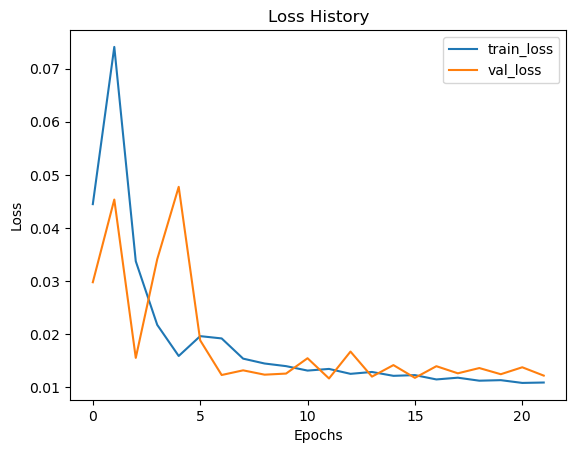

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

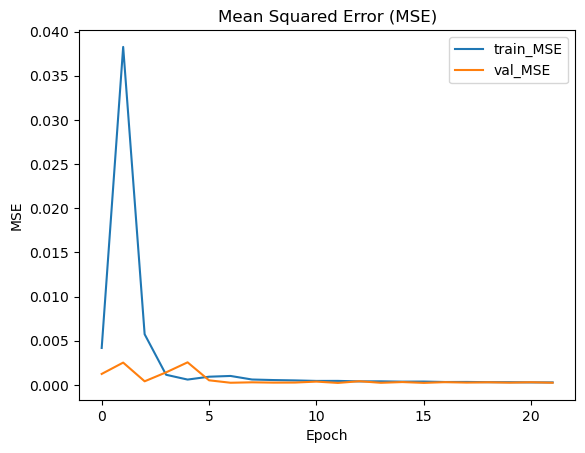

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

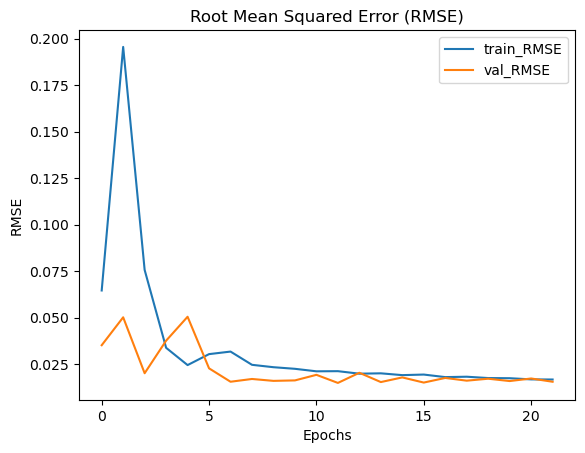

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

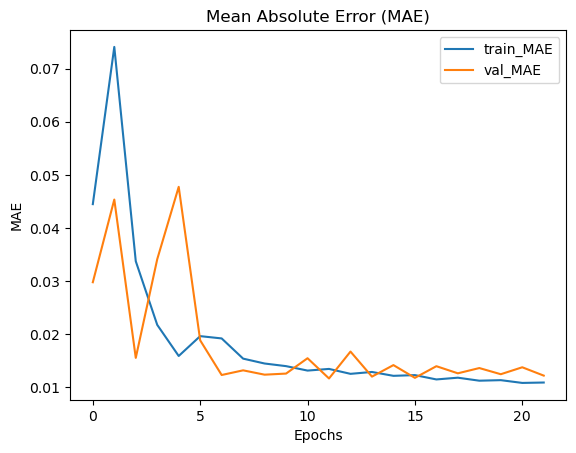

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

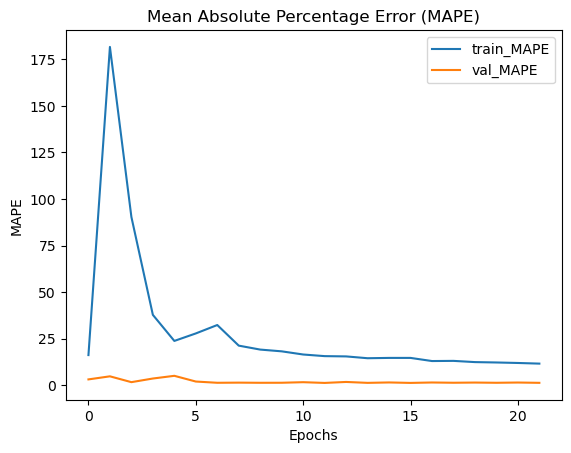

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:58:49.394788: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


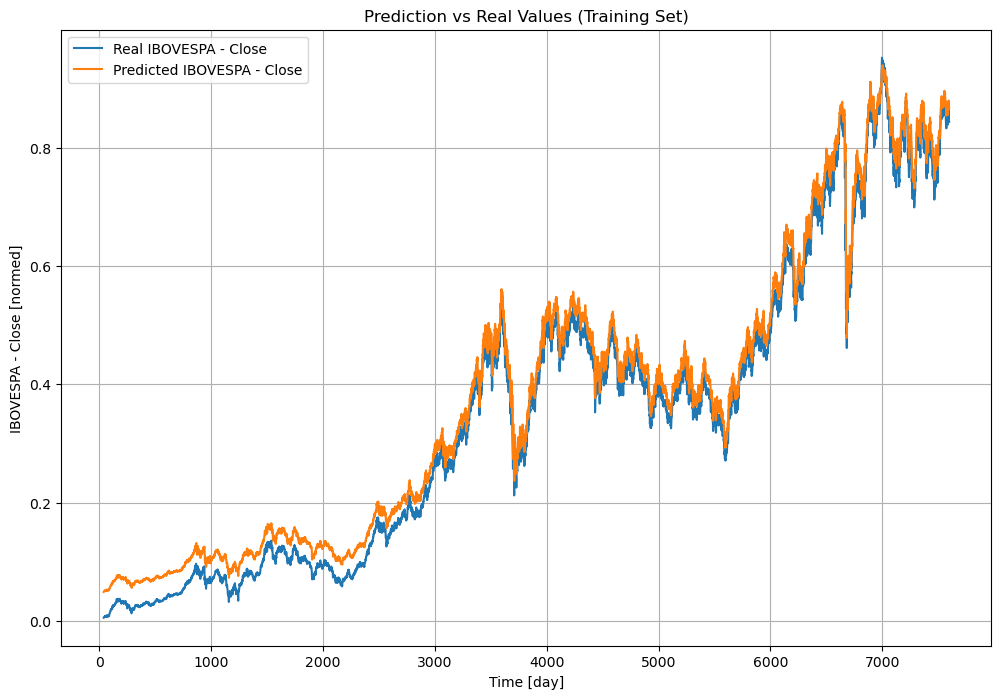

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


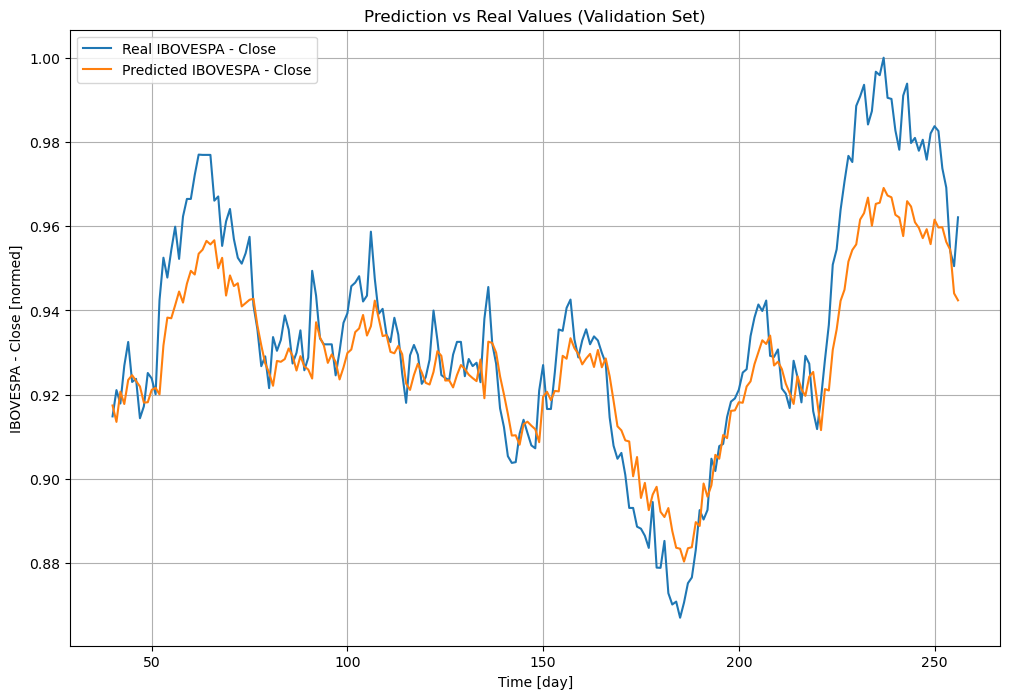

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


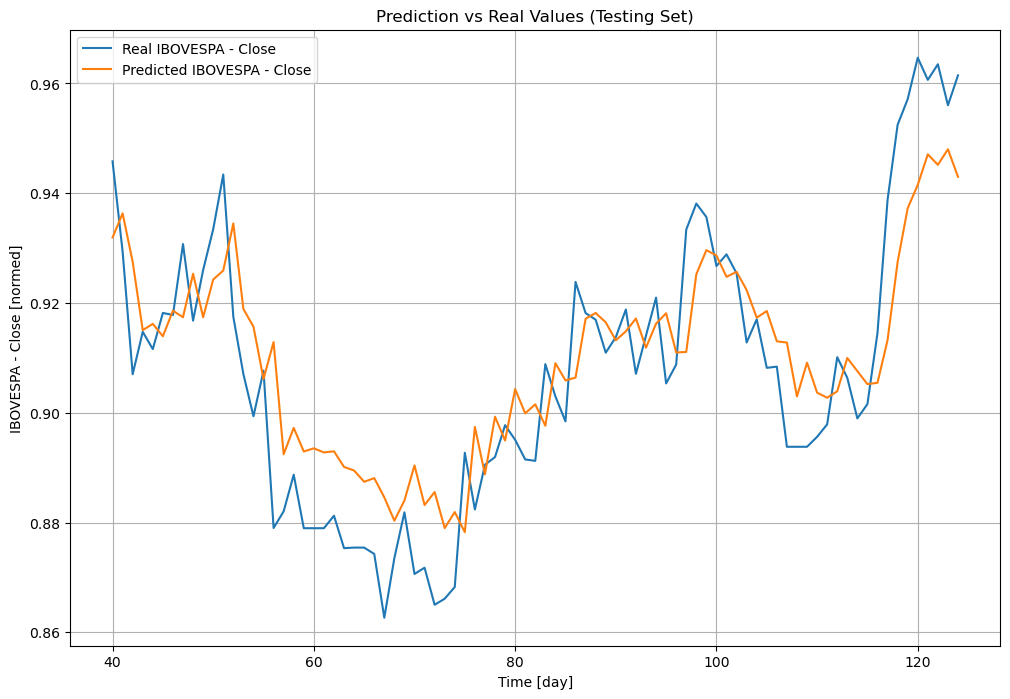

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

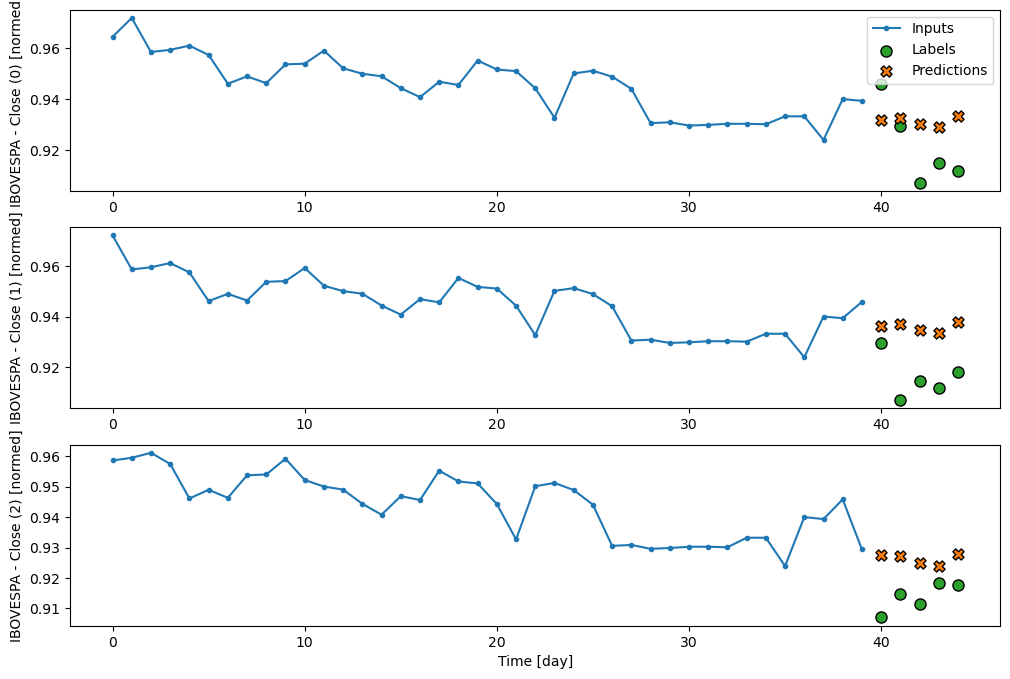

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:2s:362ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[[0.93193775, 0.93193775, 0.93193775, ..., 0.93193775,
         0.93193775, 0.93193775],
        [0.9323654 , 0.9323654 , 0.9323654 , ..., 0.9323654 ,
         0.9323654 , 0.9323654 ],
        [0.9301405 , 0.9301405 , 0.9301405 , ..., 0.9301405 ,
         0.9301405 , 0.9301405 ],
        [0.9289532 , 0.9289532 , 0.9289532 , ..., 0.9289532 ,
         0.9289532 , 0.9289532 ],
        [0.93317914, 0.93317914, 0.93317914, ..., 0.93317914,
         0.9331794 , 0.9331794 ]],

       [[0.9363342 , 0.9363342 , 0.9363342 , ..., 0.9363342 ,
         0.9363342 , 0.9363342 ],
        [0.93696165, 0.93696165, 0.93696165, ..., 0.93696165,
         0.93696165, 0.93696165],
        [0.934814  , 0.934814  , 0.934814  , ..., 0.934814  ,
         0.934814  , 0.934814  ],
        [0.9335396 , 0.9335396 , 0.9335396 , ..., 0.9335396 ,
         0.9335396 , 0.9335396 ],
        [0.937922  , 0.937922  , 0.937922  , ..., 0.937922  ,
         0.9379219 , 0.9379219 ]],

       [[0.9274932 , 0.9274932 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')